In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from embedding_creation import get_entities, Discipline
from ast import literal_eval
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import warnings
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import cosine
from community import community_louvain
import random
from scipy.stats import entropy

import json

import pandas as pd
import warnings
import numpy as np
from scipy.stats import entropy
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt
import networkx as nx
import graphviz
import pydot
from tqdm.notebook import tqdm
from pprint import pprint
from operator import itemgetter
from itertools import combinations, chain
import re
import ast
import glob
from ast import literal_eval
import os

sns.set_palette("Set2")
# sns.set_style("ticks")

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")
sns.set_context("notebook")

# warnings.filterwarnings("ignore")

In [3]:
# кластеры сущностей
dict_clusters = pd.read_csv("clusters_of_disciplines.csv")
dict_clusters = dict_clusters["nodes"].to_dict()

for key, value in dict_clusters.items():
    dict_clusters[key] = literal_eval(value)

dict_clusters

{0: ('Биометрические системы аутентификации',
  'Схема биометрического анализа.',
  'Оптические волноводы',
  'Биометрические характеристики',
  'Локализация лиц',
  'Методы и алгоритмы машинного обучения',
  'Экспертные системы',
  'Виртуальное управление бизнес-процессами',
  'Интеллектуальные обучающие технологии',
  'Классификация последовательностей',
  'Мультиязычные методы',
  'Диалоговые системы',
  'Языковые модели',
  'Методы сбора данных',
  'Персональные помощники',
  'Приложения искусственного интеллекта',
  'Искусственный интеллект',
  'Стохастические нейронные сети',
  'Внешние интерфесы',
  'Типовые модели неисправностей',
  'Контекстное знание',
  'Электронные научные ресурсы',
  'Закон Хипса',
  'Машинный перевод',
  'Автоматизация производств',
  'Графы знаний',
  'Математическая логика',
  'Прямой и обратный логический вывод',
  'Технологии обработки текстовой информации',
  'Антагонистические игры',
  'Семантические сети',
  'Интеллектуальный анализ текстов',
  'Мо

In [36]:
df = pd.read_csv("plans_disciplines_vectorized.csv")

# данные по дисциплинам из БД
disc = pd.read_csv("disc_contents20230506_4.csv")
disc["comb_res"] = disc.comb_res.apply(literal_eval)
disc["embed"] = disc.comb_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

up = df[["up_id", "up_title", "course_id"]]
up = pd.merge(up, disc, left_on="course_id", right_on="id")
up

up_id                                           up_title  course_id  \
0       6940      Интеллектуальные системы в гуманитарной сфере      10258   
1       6941   Программирование в инфокоммуникационных системах      10258   
2       6918                     Мобильные и сетевые технологии      10258   
3       6933  Иностранные языки и информационные технологии ...      10258   
4       7035                     Мобильные и сетевые технологии      10258   
...      ...                                                ...        ...   
31498   7085                        Цифровые системы управления      16454   
31499   7085                        Цифровые системы управления      16371   
31500   7462       Математические технологии системного анализа      23951   
31501   7462       Математические технологии системного анализа      23952   
31502   7462       Математические технологии системного анализа      23954   

       Unnamed: 0     id discipline_code  \
0            1728  10258            2675   
1            1728  10258            2675   
2            1728  10258            2675   
3            1728  10258            2675   
4            1728  10258            2675   
...           ...    ...             ...   
31498        4343  16454           12123   
31499        4282  16371             877   
31500        7892  23951           31277   
31501        7893  23952           31279   
31502        7895  23954           31272   

                                                   title qualification  \
0                 Основы обработки мультимедийных данных      bachelor   
1                 Основы обработки мультимедийных данных      bachelor   
2                 Основы обработки мультимедийных данных      bachelor   
3                 Основы обработки мультимедийных данных      bachelor   
4                 Основы обработки мультимедийных данных      bachelor   
...                                                  ...           ...   
31498           Управление приводами / Actuators Control        master   
31499  Адаптивное и робастное управление / Adaptive a...        master   
31500                              Технологии теории игр        master   
31501                       Статистический анализ систем        master   
31502                        Создание и обучение моделей        master   

                                             description work_status  \
0      Дисциплина по выбору для студентов факультета ...           w   
1      Дисциплина по выбору для студентов факультета ...           w   
2      Дисциплина по выбору для студентов факультета ...           w   
3      Дисциплина по выбору для студентов факультета ...           w   
4      Дисциплина по выбору для студентов факультета ...           w   
...                                                  ...         ...   
31498  Course Description\n\nThe objective of this co...           a   
31499  The aim of this discipline is to explain the m...           w   
31500  Курс направлен на знакомство с основами теории...           w   
31501  При изучении сложных объектов и систем часто в...           w   
31502  Цели и задачи курса: Курс направлен на знакомс...           w   

                                           section_topic  \
0      Анализ мультимедийных данных. Задачи анализа и...   
1      Анализ мультимедийных данных. Задачи анализа и...   
2      Анализ мультимедийных данных. Задачи анализа и...   
3      Анализ мультимедийных данных. Задачи анализа и...   
4      Анализ мультимедийных данных. Задачи анализа и...   
...                                                  ...   
31498  Basic theory of AC electrical machines and des...   
31499  Adaptive Output Control for Linear Plants. Dir...   
31500  Применение ТИ к ИС. Основы теории игр. Теорети...   
31501  Статистический анализ систем. Статистические м...   
31502  Введение в машинное обучение. Статистика, анал...   

                                                raw_text  \
0     

In [37]:
with open("up_isu_20230407.json") as f:
    js = json.load(f)

for up_isu in js.keys():
    for i in range(len(js[up_isu])):
        js[up_isu][i]["disciplines_blocks"] = json.loads(js[up_isu][i]["disciplines_blocks"])

df = pd.json_normalize(pd.DataFrame.from_dict(js)["up_isu"])
df = df[df["disciplines_blocks.block_name"] == "Блок 1. Модули (дисциплины)"]

explode_discipline_modules = df.explode("disciplines_blocks.discipline_modules")
explode_discipline_modules_norm = pd.json_normalize(explode_discipline_modules["disciplines_blocks.discipline_modules"])

attach_discipline_modules = pd.concat([explode_discipline_modules.reset_index(),
                                       explode_discipline_modules_norm.reset_index()], axis=1)
# print(attach_discipline_modules.columns)
discipline_modules = attach_discipline_modules[["id", "direction_code", "edu_program_id", "edu_program_name",
                                                       "training_period", "selection_year", "module_id ", "module_name", "disciplines"]]

disciplines_explode = discipline_modules.explode("disciplines")
discipline_norm = pd.json_normalize(disciplines_explode["disciplines"])

disciplines = pd.concat([disciplines_explode.reset_index(), discipline_norm.reset_index()], axis=1)
edu_plans = disciplines[["id", "direction_code", "edu_program_id", "edu_program_name", "training_period",
                           "selection_year", "is_optional", "module_id ", "module_name", "plan_order", "dis_id", "disc_id", "discipline_name", "ze"]]

edu_plans["ze_tot"] = edu_plans.ze.apply(lambda row: sum(filter(None, [elem["points"] for elem in row])))
edu_plans["ze"] = edu_plans["ze"].apply(lambda row: [x["sem"] for x in row if x["points"] is not None])

edu_plans

id direction_code edu_program_id  \
0      15872       15.04.06           7987   
1      15872       15.04.06           7987   
2      15872       15.04.06           7987   
3      15872       15.04.06           7987   
4      15872       15.04.06           7987   
...      ...            ...            ...   
46968  18339       01.03.02           8275   
46969  18339       01.03.02           8275   
46970  18339       01.03.02           8275   
46971  18339       01.03.02           8275   
46972  18339       01.03.02           8275   

                                        edu_program_name training_period  \
0      Робототехника и искусственный интеллект / Robo...               2   
1      Робототехника и искусственный интеллект / Robo...               2   
2      Робототехника и искусственный интеллект / Robo...               2   
3      Робототехника и искусственный интеллект / Robo...               2   
4      Робототехника и искусственный интеллект / Robo...               2   
...                                                  ...             ...   
46968  Компьютерные технологии: Программирование и ис...               4   
46969  Компьютерные технологии: Программирование и ис...               4   
46970  Компьютерные технологии: Программирование и ис...               4   
46971  Компьютерные технологии: Программирование и ис...               4   
46972  Компьютерные технологии: Программирование и ис...               4   

      selection_year  is_optional  module_id   \
0               2022         True        5007   
1               2022         True        5007   
2               2022         True        4823   
3               2022         True        4823   
4               2022         True        5009   
...              ...          ...         ...   
46968           2023         True       10205   
46969           2023         True       10205   
46970           2023         True       10205   
46971           2023         True       10205   
46972           2023         True       10205   

                              module_name  plan_order  dis_id  disc_id  \
0            Обязательный модуль (2 спец)   П2.В2.1.1   39550    17044   
1            Обязательный модуль (2 спец)   П2.В2.1.2   45733    17068   
2                            Basic (v. 3)   У.3.В12.1   44853    16453   
3                            Basic (v. 3)   У.3.В12.2   44854    16454   
4                       Выбор дисциплин 2  П2.В2.3.В1   45736    17098   
...                                   ...         ...     ...      ...   
46968  Пул выборных дисциплин (4 семестр)       10532   30281    20041   
46969  Пул выборных дисциплин (4 семестр)       10530   26207    20031   
46970  Пул выборных дисциплин (4 семестр)       10534   25549    20043   
46971  Пул выборных дисциплин (4 семестр)       10529   25927    20033   
46972  Пул выборных дисциплин (4 семестр)       10533   25256    20042   

                                         discipline_name   ze  ze_tot  
0              Методы машинного обучения в робототехнике  [2]       6  
1       Современные методы управления и принятия решений  [2]       3  
2      Первичная обработка данных и Хранение больших ...  [1]       3  
3      Статистика на R и Введение в МО (инструменты) ...  [2]       3  
4      Микропроцессорные и распределенные системы упр...  [2]       3  
...                                                  ...  ...     ...  
46968                                         Теория игр  [4]       3  
46969                        Прикладное программирование  [4]       3  
46970                                       Криптография  [4]       3  
46971                              Обработка изображений  [4]       3  
46972                           Вычислительная геометрия  [4]       3  

[46973 rows x 15 columns]

In [38]:
df = pd.read_csv("plans_disciplines_vectorized.csv")

up = df[["up_id", "up_title", "course_id", "year", "qualification", "discipline_code"]]
up = pd.merge(up, disc, left_on="course_id", right_on="id")
# print(up.columns)

valid_plans = edu_plans[["disc_id", "module_id ", "is_optional", "ze"]]
up = pd.merge(up, valid_plans, left_on="discipline_code_x", right_on="disc_id")

up

up_id                                       up_title  course_id  \
0         6940  Интеллектуальные системы в гуманитарной сфере      10258   
1         6940  Интеллектуальные системы в гуманитарной сфере      10258   
2         6940  Интеллектуальные системы в гуманитарной сфере      10258   
3         6940  Интеллектуальные системы в гуманитарной сфере      10258   
4         6940  Интеллектуальные системы в гуманитарной сфере      10258   
...        ...                                            ...        ...   
1942991   6909                             Бизнес-информатика      24548   
1942992   6909                             Бизнес-информатика      24547   
1942993   7462   Математические технологии системного анализа      23951   
1942994   7462   Математические технологии системного анализа      23952   
1942995   7462   Математические технологии системного анализа      23954   

         year qualification_x  discipline_code_x  Unnamed: 0     id  \
0        2019        bachelor               2675        1728  10258   
1        2019        bachelor               2675        1728  10258   
2        2019        bachelor               2675        1728  10258   
3        2019        bachelor               2675        1728  10258   
4        2019        bachelor               2675        1728  10258   
...       ...             ...                ...         ...    ...   
1942991  2020        bachelor              29972        8159  24548   
1942992  2020        bachelor              29971        8158  24547   
1942993  2023          master              31277        7892  23951   
1942994  2023          master              31279        7893  23952   
1942995  2023          master              31272        7895  23954   

        discipline_code_y                                   title  \
0                    2675  Основы обработки мультимедийных данных   
1                    2675  Основы обработки мультимедийных данных   
2                    2675  Основы обработки мультимедийных данных   
3                    2675  Основы обработки мультимедийных данных   
4                    2675  Основы обработки мультимедийных данных   
...                   ...                                     ...   
1942991             29972                             Базы данных   
1942992             29971        Инновационные технологии бизнеса   
1942993             31277                   Технологии теории игр   
1942994             31279            Статистический анализ систем   
1942995             31272             Создание и обучение моделей   

        qualification_y                                        description  \
0              bachelor  Дисциплина по выбору для студентов факультета ...   
1              bachelor  Дисциплина по выбору для студентов факультета ...   
2              bachelor  Дисциплина по выбору для студентов факультета ...   
3              bachelor  Дисциплина по выбору для студентов факультета ...   
4              bachelor  Дисциплина по выбору для студентов факультета ...   
...                 ...                                                ...   
1942991        bachelor  Базы данных являются неотъемлемой частью больш...   
1942992        bachelor  Курс "Инновационные технологии бизнеса" направ...   
1942993          master  Курс направлен на знакомство с основами теории...   
1942994          master  При изучении сложных объектов и систем часто в...   
1942995          master  Цели и задачи курса: Курс направлен на знакомс...   

        work_status                                      section_topic  \
0                 w  Анализ мультимедийных данных. Задачи анализа и...   
1                 w  Анализ мультимедийных данных. Задачи анализа и...   
2                 w  Анализ мультимедийных данных. Задачи анализа и...   
3                 w  Анализ мультимедийных данных. Задачи анализа и...   
4                 w  Анализ мультимедийных данных. Задачи анализа и...   
...             ...              

In [39]:
up = up.drop_duplicates(subset=["up_id", "course_id"])
up.rename(columns={"qualification_x": "qualification"}, inplace=True)

up.qualification.value_counts()

bachelor      15692
master        13145
specialist      377
Name: qualification, dtype: int64

135
(29214, 28)
(19784, 28)


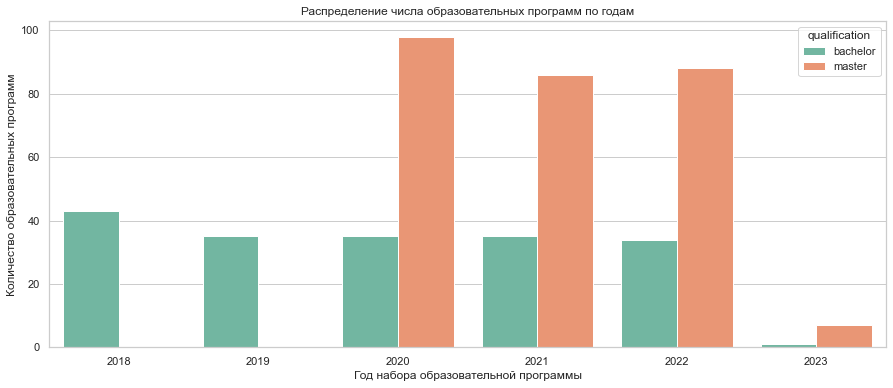

In [9]:
to_vis = up.groupby(["year", "qualification"])["up_id"].nunique().reset_index()

common_disciplines = []

by_year_and_qualification = up.groupby(["year", "qualification"])

for (y, q), group in by_year_and_qualification:
    if q != "specialist":
        common = group.up_id.nunique() - 10
        common_disciplines.extend(group.course_id.value_counts().reset_index().query("course_id >= %d" %(common))["index"].tolist())

common_disciplines = list(set(common_disciplines))
print(len(common_disciplines))

print(up.shape)  # все дисциплины
print(up[~up.course_id.isin(common_disciplines)].shape)  # без общих дисциплин

up_uncommon = up[~up.course_id.isin(common_disciplines)]
up_uncommon.rename(columns={"module_id ": "module_id"}, inplace=True)

plt.figure(figsize=(15,6))
plt.title("Распределение числа образовательных программ по годам")
sns.barplot(data=to_vis.query("qualification != 'specialist'"), x="year", y="up_id", hue="qualification")
plt.xlabel("Год набора образовательной программы")
plt.ylabel("Количество образовательных программ")
plt.show()

In [10]:
# датасеты с планами бакалавриата

up_bac_2018 = up_uncommon.query("qualification != 'master' & year == 2018")
up_bac_2019 = up_uncommon.query("qualification != 'master' & year == 2019")
up_bac_2020 = up_uncommon.query("qualification != 'master' & year == 2020")
up_bac_2021 = up_uncommon.query("qualification != 'master' & year == 2021")
up_bac_2022 = up_uncommon.query("qualification != 'master' & year == 2022")

# датасеты с планами магистратуры

up_mas_2020 = up_uncommon.query("qualification == 'master' & year == 2020")
up_mas_2021 = up_uncommon.query("qualification == 'master' & year == 2021")
up_mas_2022 = up_uncommon.query("qualification == 'master' & year == 2022")

In [11]:
res_options = []
for res in up.comb_res.tolist():
    res_options.extend(res)

# сущности, которые встречаются в дисциплинах
res_options = set(res_options)

# Эксперименты с diversity

## Случайные сущности

### Граф

In [85]:
def most_similar_cluster(embed, clus):
    sim = [np.round(1-cosine(cl_embed, embed), 3) for cl_embed in clus.values()]
    return np.argmax(np.array(sim)), np.max(sim)

def calculate_cosine_distance(vectors):
    num_vectors = len(vectors)
    similarity_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(num_vectors):
            similarity_matrix[i, j] = 1-cosine_similarity([vectors[i]], [vectors[j]])[0, 0]

    return similarity_matrix


def calculate_cosine_similarity(vectors):
    num_vectors = len(vectors)
    similarity_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(num_vectors):
            similarity_matrix[i, j] = cosine_similarity([vectors[i]], [vectors[j]])[0, 0]

    return similarity_matrix


def calculate_diversity(up, up_id_title, res_title, embed_title):
   title, year = up_id_title
   up_groups = up.groupby(up_id_title)
   idx = range(len(up_groups))

   d_gr = pd.DataFrame(columns=[0,1,2,3,4,5])

   for i, _group in zip(idx, up_groups):
      try:
            _, group = _group
            diversity = []

            # создание графа УП
            gr = group[[title, year, "course_id"]]
            gr = pd.merge(gr, gr, on=up_id_title).drop_duplicates()
            gr = gr[gr["course_id_x"]!=gr["course_id_y"]].reset_index(drop=True)
            ents = group[["course_id", res_title]]
            gr = pd.merge(gr, ents, left_on="course_id_x", right_on="course_id")
            gr = pd.merge(gr, ents, left_on="course_id_y", right_on="course_id")
            gr.columns = [title, year, 'course_id_x_', 'course_id_y_', 'course_id_x', res_title+'_x',
               'course_id_y', res_title+'_y']
            gr.drop_duplicates(inplace=True, subset=['course_id_x_', 'course_id_y_', 'course_id_x', 'course_id_y'])
            gr["weight"] = gr.apply(lambda row: len(set(row[res_title+"_x"]).intersection(row[res_title+"_y"])), axis=1)

            pairs = gr[gr.weight > 0][["course_id_x", "course_id_y", "weight"]]
            pairs = pairs.values.tolist()
            set_of_pairs = set()
            for word1, word2, weight in pairs:
               first, second = sorted([word1, word2])
               set_of_pairs.add((first, second, weight))
            list_of_pairs = list(set_of_pairs)

            G = nx.Graph()
            G.add_weighted_edges_from(list_of_pairs)

            # кластеризация графа
            if len(G.edges) > 0:
               communities = community_louvain.best_partition(G)
               nx.set_node_attributes(G, communities, 'modularity')
               modularity_score = round(community_louvain.modularity(communities, G), 3)

               modul = {}
               for k, v in communities.items():
                  if v not in modul:
                     modul[v] = [k]
                  else:
                     modul[v].append(k)

               # print(modul)
               # break
               modul1 = {}
               for k, v in modul.items():
                  if len(v) >= 2:
                     modul1[k] = v

               
               modularity = dict.fromkeys(range(len(modul1)))
               for k in modularity.keys():
                  to_save = modul1.popitem()
                  modularity[k] = to_save[1]


               # распределение изолированных вершин по кластерам
               in_graph = []
               embeds = {}
               for cl, discs in modularity.items():
                  data = pd.DataFrame(group[group.course_id.isin(discs)][embed_title].tolist()).dropna()
                  data[embed_title] = data.apply(lambda row: np.array(row), axis=1)
                  embeds[cl] = data[embed_title].mean()
                  in_graph.extend(discs)
               
               not_in_graph = group[~group.course_id.isin(in_graph)].course_id.values

               extras = []
               # print(embeds.keys())
               for vert in not_in_graph:
                  cl, sim = most_similar_cluster(group[group.course_id == vert][embed_title].values[0], embeds)
                  if sim >= 0.3 and sim < 1:
                     # print(sim, cl)
                     modularity[cl] += [vert]
                  else:
                     extras.append(vert)
               modularity[max(modularity.keys())+1] = extras

               clusters = len(modularity)

               embeds = {}
               discipline_similarity = []
               for cl, discs in modularity.items():
                  data = pd.DataFrame(group[group.course_id.isin(discs)][embed_title].tolist()).dropna()
                  data[embed_title] = data.apply(lambda row: np.array(row), axis=1)
                  if not np.isnan(data[embed_title].mean()).any():
                     embeds[cl] = data[embed_title].mean()

                  sim_matrix = calculate_cosine_similarity(data[embed_title].tolist())
                  discipline_similarity.append(np.mean(sim_matrix))

               # print(embeds)

               # оценка расстояния между кластерами
               # if not np.isnan(embeds.values()).any():
               cosine_distances = calculate_cosine_distance(list(embeds.values()))
               distances = np.mean(cosine_distances)

               # расчет среднего внутрикластерного расстояния
               distance_inside_clusters = np.mean(discipline_similarity)

               diversity.append([group[year].iloc[0], group.up_title.iloc[0], group.shape[0], clusters, 
                                 modularity_score, distances, distance_inside_clusters])
            else:
               diversity.append([group[year].iloc[0], group.up_title.iloc[0], group.shape[0], 0, 0, 0, 0])
            d_gr = d_gr.append(diversity).reset_index(drop=True)
      except ValueError:
         pass

   d_gr.columns = ["up_id", "up_title", "n_courses", "n_clusters", "modularity", "diversity", "inside_distance"]
   return d_gr

### Бакалавриат

#### 2018 год

In [20]:
up_bac_2018["random_res"] = up_bac_2018.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2018["random_embed"] = up_bac_2018.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

In [24]:
d_gr_real_2018 = calculate_diversity(up_bac_2018, "up_id", "comb_res", "embed")
display(d_gr_real_2018.sample(2))

d_gr_fake_2018 = calculate_diversity(up_bac_2018, "up_id", "random_res", "random_embed")
display(d_gr_fake_2018.sample(2))

up_id                          up_title n_courses n_clusters  modularity  \
7   6867  Прикладная и компьютерная оптика        26          4       0.424   
24  6895     Вычислительные системы и сети        42          7       0.431   

    diversity  inside_distance  
7    0.630968         0.402001  
24   0.665650         0.373508

up_id                           up_title n_courses n_clusters  modularity  \
24  6895      Вычислительные системы и сети        42         11       0.888   
29  6900  Управление в технических системах        20          3       0.444   

    diversity  inside_distance  
24   0.549998         0.557524  
29   0.382063         0.362957

In [57]:
d_gr_real_2018["rf"] = "Реальные данные"
d_gr_fake_2018["rf"] = "Искусственные данные"
rf2018 = pd.concat([d_gr_real_2018, d_gr_fake_2018])
rf2018.sample(2)

up_id                        up_title n_courses n_clusters  modularity  \
32  6903    Инфокоммуникационные системы        37          6       0.735   
31  6902  Мобильные и сетевые технологии        32          7       0.626   

    diversity  inside_distance                    rf  
32   0.511203         0.465207  Искусственные данные  
31   0.783394         0.639574       Реальные данные

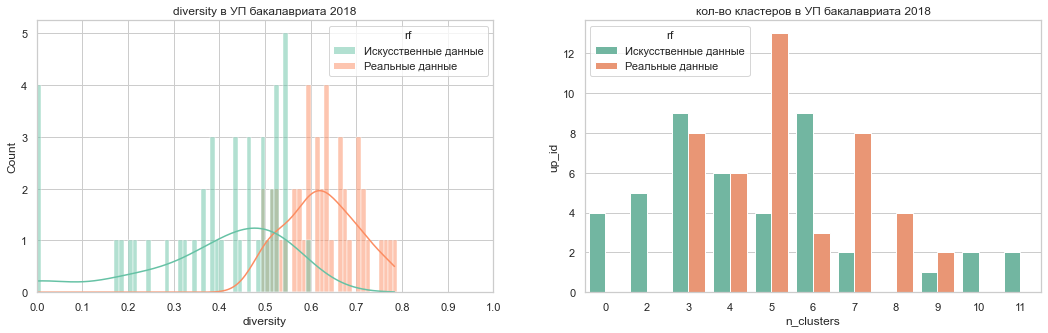

In [66]:
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2018")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2018.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2018")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2018.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2019 год

up_id                                 up_title n_courses n_clusters  \
43  7346          Нанофотоника и квантовая оптика        47          9   
37  7310  Низкотемпературная техника и энергетика        22          3   

    modularity  diversity  inside_distance               rf  
43       0.603   0.613275         0.533947  Реальные данные  
37       0.227   0.493239         0.461125  Реальные данные

up_id                                up_title n_courses n_clusters  \
43  7346         Нанофотоника и квантовая оптика        47          7   
34  6905  Программирование и интернет-технологии        33          6   

    modularity  diversity  inside_distance                    rf  
43       0.816   0.547763         0.420424  Искусственные данные  
34       0.750   0.465183         0.461182  Искусственные данные

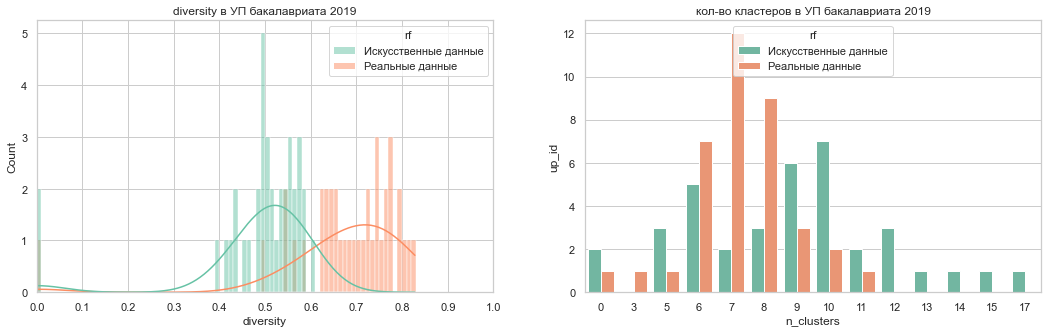

In [67]:
up_bac_2019["random_res"] = up_bac_2019.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2019["random_embed"] = up_bac_2019.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2019 = calculate_diversity(up_bac_2019, "up_id", "comb_res", "embed")
display(d_gr_real_2018.sample(2))

d_gr_fake_2019 = calculate_diversity(up_bac_2019, "up_id", "random_res", "random_embed")
display(d_gr_fake_2018.sample(2))

d_gr_real_2019["rf"] = "Реальные данные"
d_gr_fake_2019["rf"] = "Искусственные данные"
rf2019 = pd.concat([d_gr_real_2019, d_gr_fake_2019])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2019")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2019.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2019")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2019.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2020 год

up_id                        up_title n_courses n_clusters  modularity  \
1   6886                    Биоинженерия        48          9       0.663   
19  7035  Мобильные и сетевые технологии        42          9       0.514   

    diversity  inside_distance  
1    0.701761         0.511997  
19   0.778232         0.576230

up_id                                          up_title n_courses  \
32  7312           Низкотемпературная техника и энергетика        48   
16  6989  Программирование в инфокоммуникационных системах        48   

   n_clusters  modularity  diversity  inside_distance  
32         10       0.857   0.587761         0.493837  
16         10       0.763   0.488272              NaN

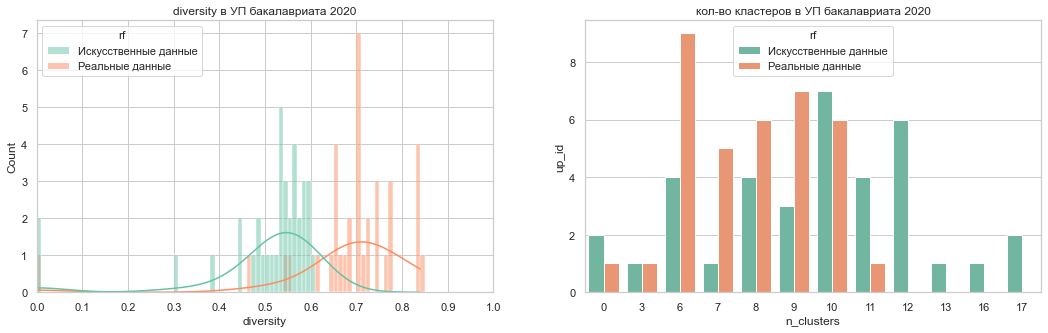

In [74]:
up_bac_2020["random_res"] = up_bac_2020.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2020["random_embed"] = up_bac_2020.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2020 = calculate_diversity(up_bac_2020, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2020 = calculate_diversity(up_bac_2020, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2020["rf"] = "Реальные данные"
d_gr_fake_2020["rf"] = "Искусственные данные"
rf2020 = pd.concat([d_gr_real_2020, d_gr_fake_2020])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2020")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2020.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2021 год

up_id                              up_title n_courses n_clusters  \
28  7095           Цифровые системы управления        11          3   
35  7345  Оптико-электронные приборы и системы        44          6   

    modularity  diversity  inside_distance               rf  
28       0.375   0.543483         0.442246  Реальные данные  
35       0.507   0.613729         0.362604  Реальные данные

up_id                                       up_title n_courses n_clusters  \
29  7103  Иностранные языки и информационные технологии        45          6   
24  7079              Компьютерные технологии в дизайне        60          8   

    modularity  diversity  inside_distance                    rf  
29       0.750   0.483498         0.368478  Искусственные данные  
24       0.777   0.488638         0.362782  Искусственные данные

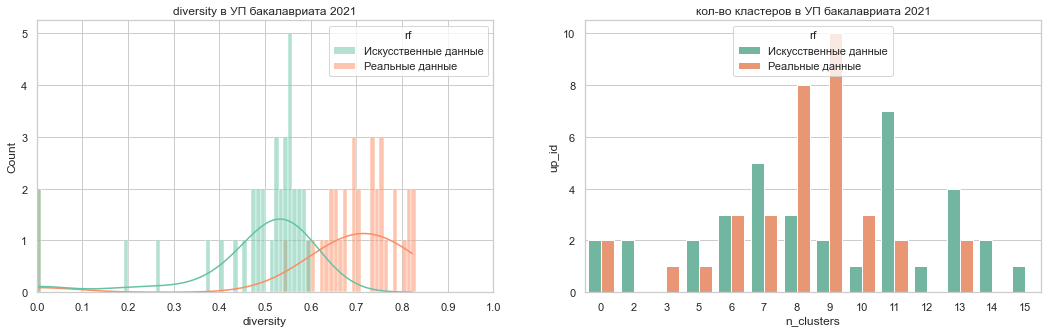

In [73]:
up_bac_2021["random_res"] = up_bac_2021.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2021["random_embed"] = up_bac_2021.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2021 = calculate_diversity(up_bac_2021, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2021 = calculate_diversity(up_bac_2021, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2021["rf"] = "Реальные данные"
d_gr_fake_2021["rf"] = "Искусственные данные"
rf2021 = pd.concat([d_gr_real_2021, d_gr_fake_2021])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2021")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2021.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022 год

up_id                      up_title n_courses n_clusters  modularity  \
7   6972  Технологии защиты информации        68         10       0.464   
17  6990    Фотоника и оптоинформатика        25          6       0.547   

    diversity  inside_distance               rf  
7    0.832520         0.587834  Реальные данные  
17   0.682811         0.547054  Реальные данные

up_id                      up_title n_courses n_clusters  modularity  \
1  6886                  Биоинженерия        48          7       0.793   
7  6972  Технологии защиты информации        68         12       0.893   

   diversity  inside_distance                    rf  
1   0.483215         0.387757  Искусственные данные  
7   0.555740         0.484731  Искусственные данные

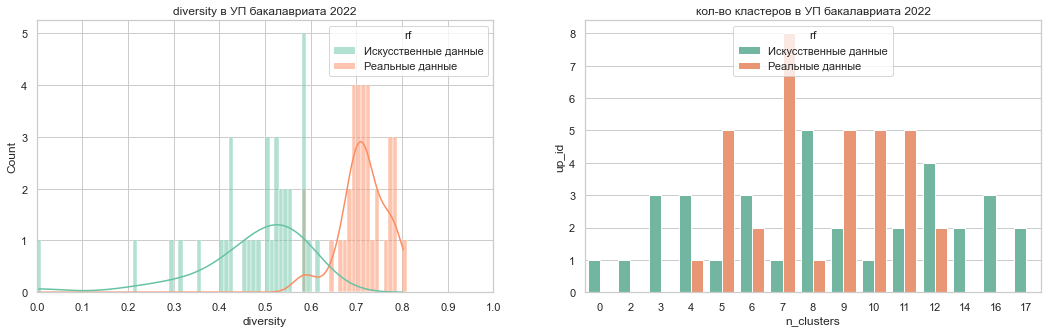

In [72]:
up_bac_2022["random_res"] = up_bac_2022.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2022["random_embed"] = up_bac_2022.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2022 = calculate_diversity(up_bac_2022, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2022 = calculate_diversity(up_bac_2022, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2022["rf"] = "Реальные данные"
d_gr_fake_2022["rf"] = "Искусственные данные"
rf2022 = pd.concat([d_gr_real_2022, d_gr_fake_2022])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2022")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2022.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

### Магистратура

#### 2020

up_id                                           up_title n_courses  \
34  7018  Функциональная безопасность беспилотных трансп...        18   
92  7332  Стандартизация и метрология в высокотехнологич...        18   

   n_clusters  modularity  diversity  inside_distance  
34          5       0.628   0.710127         0.718012  
92          5       0.568   0.762480         0.747490

up_id                                 up_title n_courses n_clusters  \
21  7004  Нейротехнологии и программная инженерия        23          0   
1   6874              Цифровые системы управления        45          8   

    modularity  diversity  inside_distance  
21       0.000   0.000000         0.000000  
1        0.713   0.546429         0.438902

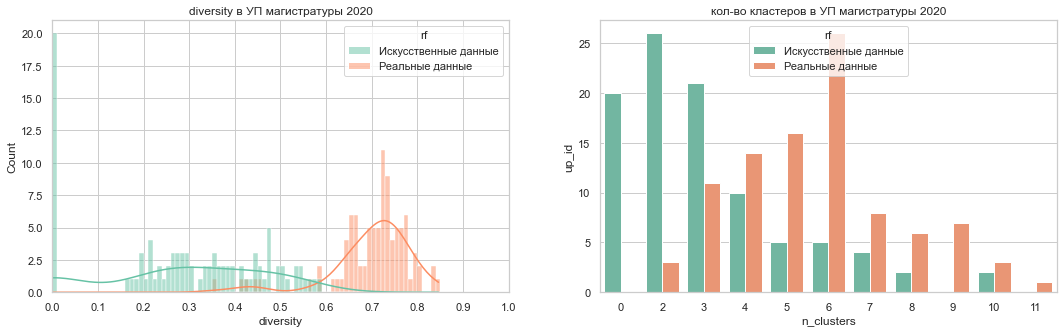

In [76]:
up_mas_2020["random_res"] = up_mas_2020.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_mas_2020["random_embed"] = up_mas_2020.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2020_mas = calculate_diversity(up_mas_2020, "up_id", "comb_res", "embed")
display(d_gr_real_2020_mas.sample(2))

d_gr_fake_2020_mas = calculate_diversity(up_mas_2020, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020_mas.sample(2))

d_gr_real_2020_mas["rf"] = "Реальные данные"
d_gr_fake_2020_mas["rf"] = "Искусственные данные"
rf2020_mas = pd.concat([d_gr_real_2020_mas, d_gr_fake_2020_mas])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2020")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2020_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2021

up_id                                           up_title n_courses  \
25  7105  Световодная фотоника и программируемая электро...        51   
66  7168                  Искусство и наука / Art & Science        24   

   n_clusters  modularity  diversity  inside_distance  
25         11       0.717   0.829934          0.65559  
66          6       0.683   0.592471          0.71686

up_id                                up_title n_courses n_clusters  \
6  6950  Технологии разработки компьютерных игр        25          3   
9  6953    Финансовые технологии больших данных        32          4   

  modularity diversity  inside_distance  
6        0.5  0.410155         0.368043  
9      0.667  0.408135         0.344107

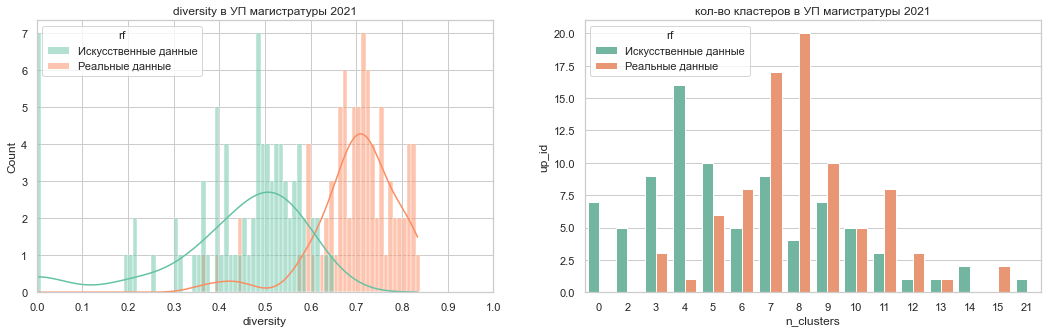

In [78]:
up_mas_2021["random_res"] = up_mas_2021.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_mas_2021["random_embed"] = up_mas_2021.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2021_mas = calculate_diversity(up_mas_2021, "up_id", "comb_res", "embed")
display(d_gr_real_2021_mas.sample(2))

d_gr_fake_2021_mas = calculate_diversity(up_mas_2021, "up_id", "random_res", "random_embed")
display(d_gr_fake_2021_mas.sample(2))

d_gr_real_2021_mas["rf"] = "Реальные данные"
d_gr_fake_2021_mas["rf"] = "Искусственные данные"
rf2021_mas = pd.concat([d_gr_real_2021_mas, d_gr_fake_2021_mas])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2021")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2021_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022 год

In [179]:
up_mas_2022["random_res"] = up_mas_2022.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_mas_2022["random_embed"] = up_mas_2022.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2022_mas = calculate_diversity(up_mas_2022, "up_id", "comb_res", "embed")
display(d_gr_real_2022_mas.sample(2))

d_gr_fake_2022_mas = calculate_diversity(up_mas_2022, "up_id", "random_res", "random_embed")
display(d_gr_fake_2022_mas.sample(2))

d_gr_real_2022_mas["rf"] = "Реальные данные"
d_gr_fake_2022_mas["rf"] = "Искусственные данные"
rf2022_mas = pd.concat([d_gr_real_2022_mas, d_gr_fake_2022_mas])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2022")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2022_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

ValueError: too many values to unpack (expected 2)

### Общее разнообразие по УП

In [178]:
d_gr_real_2018["Год"] = 2018
d_gr_real_2019["Год"] = 2019
d_gr_real_2020["Год"] = 2020
d_gr_real_2021["Год"] = 2021
d_gr_real_2022["Год"] = 2022

d_gr_real_2020_mas["Год"] = 2020
d_gr_real_2021_mas["Год"] = 2021
d_gr_real_2022_mas["Год"] = 2022

diversity_bac = pd.concat([d_gr_real_2018, d_gr_real_2019, d_gr_real_2020, d_gr_real_2021, d_gr_real_2022])
diversity_bac["Квалификация"] = "Бакалавриат"
diversity_bac["Qualification"] = "Bachelor"

diversity_mas = pd.concat([d_gr_real_2020_mas, d_gr_real_2021_mas, d_gr_real_2022_mas])
diversity_mas["Квалификация"] = "Магистратура"
diversity_mas["Qualification"] = "Master"

diversity_bac_mean = diversity_bac.groupby(["Год", "Квалификация"])["diversity"].mean().reset_index()
diversity_mas_mean = diversity_mas.groupby(["Год", "Квалификация"])["diversity"].mean().reset_index()

diversity_total_mean = pd.concat([diversity_bac_mean, diversity_mas_mean])

plt.figure(figsize=(12,5))
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)
sns.barplot(diversity_total_mean, x="Год", y="diversity", hue="Qualification")
plt.title("Average diversity of curricula over the years")
plt.xlabel("Admission year")
plt.ylabel("Diversity");

NameError: name 'd_gr_real_2018' is not defined

In [478]:
pd.concat([diversity_bac, diversity_mas]).to_csv("diversity_all_plans.csv", index=False)

## Перетасовка дисциплин по планам

In [ ]:
# перетасовка дисциплин по УП
ids = up.up_id.tolist()
random.shuffle(ids)

up["up_id_rand"] = ids
up.query("up_id != up_id_rand")

### Бакалавриат

#### 2018

up_id                                 up_title n_courses n_clusters  \
18  6880            Компьютерная графика и дизайн        23          2   
13  6875  Управление технологическими инновациями        54         11   

    modularity  diversity  inside_distance                    rf  
18       0.000   0.180868          0.31095  Искусственные данные  
13       0.858   0.542344              NaN  Искусственные данные

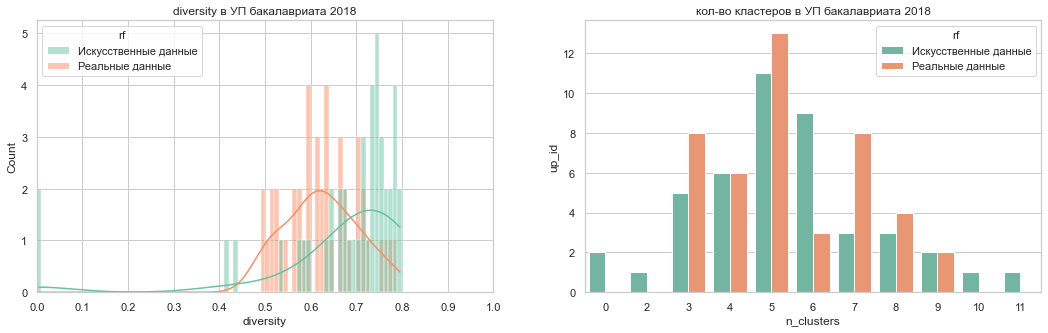

In [86]:
# Бакалавриат
# 2018 год

ids = up_bac_2018.up_id.tolist()
random.shuffle(ids)
up_bac_2018["up_id_rand"] = ids

d_gr_fake_2018_plan = calculate_diversity(up_bac_2018, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2018_plan.sample(2))

d_gr_fake_2018_plan["rf"] = "Искусственные данные"
rf2018_plans = pd.concat([d_gr_real_2018, d_gr_fake_2018_plan])
rf2018_plans.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2018")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2018_plans.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2018")
sns.barplot(rf2018_plans.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2019

up_id                                           up_title n_courses  \
0   6889  Оптико-электронные информационно-измерительные...        58   
25  6944      Интеллектуальные системы в гуманитарной сфере        59   

   n_clusters  modularity  diversity  inside_distance  
0           9       0.664   0.712883         0.399292  
25         10       0.726   0.785665         0.481066

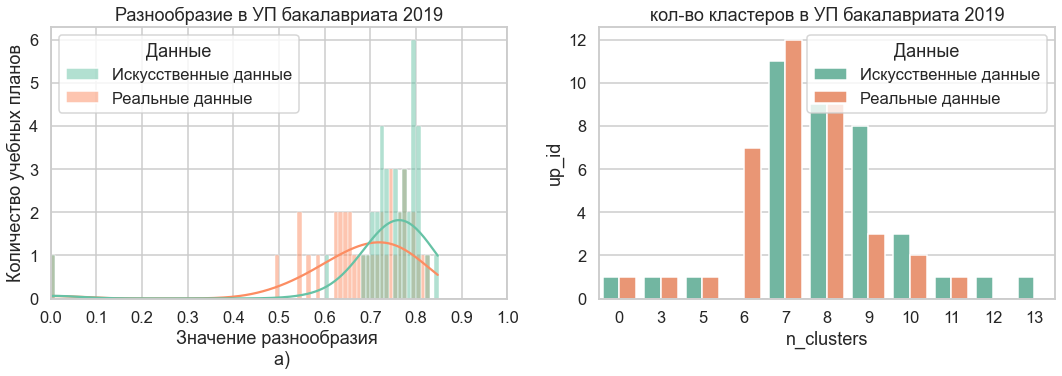

In [450]:
ids = up_bac_2019.up_id.tolist()
random.shuffle(ids)
up_bac_2019["up_id_rand"] = ids

d_gr_fake_2019_plan = calculate_diversity(up_bac_2019, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2019_plan.sample(2))

d_gr_fake_2019_plan["rf"] = "Искусственные данные"
rf2019_plans = pd.concat([d_gr_real_2019, d_gr_fake_2019_plan])
rf2019_plans.sample(2)
# оценка diversity и кол-ва кластеров

rf2019_plans.rename(columns={"rf": "Данные"}, inplace=True)
# оценка diversity и кол-ва кластеров
# fig, axis = plt.subplots(1, 2, figsize=(18, 5))

# axis[0].set_title(f"Разнообразие в УП бакалавриата 2022")
# axis[0].set_xticks(np.arange(0,1.1,0.1))
# axis[0].set_xlim(0,1)

fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"Разнообразие в УП бакалавриата 2019")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].set_ylabel("Количество учебных планов")
axis[0].set_xlabel("Значение разнообразия \n а)")
sns.histplot(ax=axis[0], data=rf2019_plans.sort_values(by="Данные"), x="diversity", kde=True, binwidth=0.01, hue="Данные")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2019")
sns.barplot(rf2019_plans.groupby(["n_clusters", "Данные"])["up_id"].count().reset_index().sort_values(by="Данные"), x="n_clusters", y="up_id", hue="Данные");


In [443]:
print(rf2019_plans.query("Данные == 'Реальные данные'").diversity.quantile(0.15))
print(rf2019_plans.query("Данные == 'Искусственные данные'").diversity.quantile(0.15))
print(rf2019_plans.query("Данные == 'Реальные данные'").diversity.quantile(0.85))
print(rf2019_plans.query("Данные == 'Искусственные данные'").diversity.quantile(0.85))

0.5994894766128699
0.7287885642449355
0.7761904822715936
0.807763011588218


#### 2020

up_id                                           up_title n_courses  \
19  7035  Иностранные языки и информационные технологии ...        42   
12  6977                                      Робототехника        68   

   n_clusters  modularity  diversity  inside_distance  
19          7       0.509   0.715732         0.503146  
12         11       0.644   0.841101         0.550990

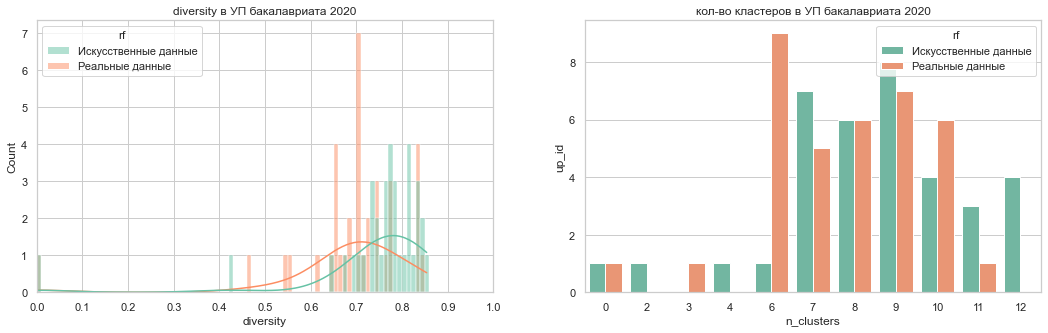

In [90]:
ids = up_bac_2020.up_id.tolist()
random.shuffle(ids)
up_bac_2020["up_id_rand"] = ids

d_gr_fake_2020_plan = calculate_diversity(up_bac_2020, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2020_plan.sample(2))

d_gr_fake_2020_plan["rf"] = "Искусственные данные"
rf2020_plans = pd.concat([d_gr_real_2020, d_gr_fake_2020_plan])
rf2020_plans.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020_plans.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2020")
sns.barplot(rf2020_plans.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");


#### 2021

up_id                      up_title n_courses n_clusters  modularity  \
29  7172  Технологии защиты информации        11          2       0.000   
16  7123   Цифровые системы управления        60          7       0.586   

    diversity  inside_distance  
29   0.454838         0.330193  
16   0.639313         0.297926

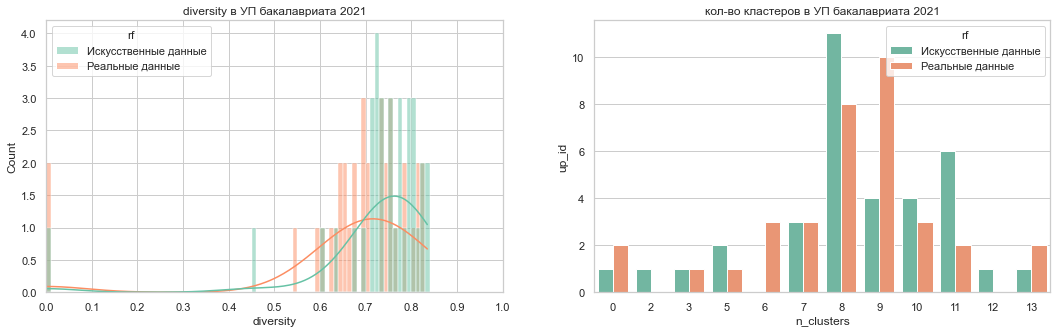

In [93]:
ids = up_bac_2021.up_id.tolist()
random.shuffle(ids)
up_bac_2021["up_id_rand"] = ids

d_gr_fake_2021_plan = calculate_diversity(up_bac_2021, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2021_plan.sample(2))

d_gr_fake_2021_plan["rf"] = "Искусственные данные"
rf2021_plans = pd.concat([d_gr_real_2021, d_gr_fake_2021_plan])
rf2021_plans.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021_plans.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2021")
sns.barplot(rf2021_plans.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");


#### 2022

up_id                                 up_title n_courses n_clusters  \
8  7234  Робототехника и искусственный интеллект        56          9   
2  7228  Робототехника и искусственный интеллект        54          9   

   modularity  diversity  inside_distance  
8       0.717   0.782133         0.562066  
2       0.690   0.766963         0.501634

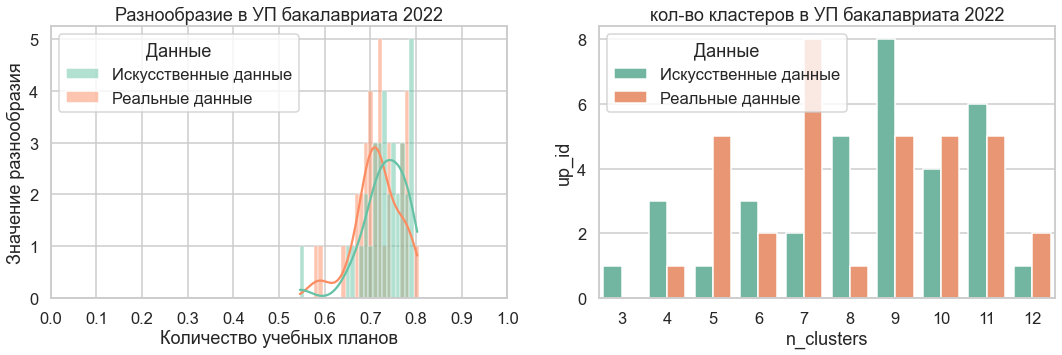

In [424]:
ids = up_bac_2022.up_id.tolist()
random.shuffle(ids)
up_bac_2022["up_id_rand"] = ids



d_gr_fake_2022_plan = calculate_diversity(up_bac_2022, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2022_plan.sample(2))

d_gr_fake_2022_plan["rf"] = "Искусственные данные"
rf2022_plans = pd.concat([d_gr_real_2022, d_gr_fake_2022_plan])
rf2022_plans.sample(2)

rf2022_plans.rename(columns={"rf": "Данные"}, inplace=True)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"Разнообразие в УП бакалавриата 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].set_xlabel("Количество учебных планов")
axis[0].set_ylabel("Значение разнообразия")
sns.histplot(ax=axis[0], data=rf2022_plans.sort_values(by="Данные"), x="diversity", kde=True, binwidth=0.01, hue="Данные")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2022")
sns.barplot(rf2022_plans.groupby(["n_clusters", "Данные"])["up_id"].count().reset_index().sort_values(by="Данные"), x="n_clusters", y="up_id", hue="Данные");

### Магистратура

#### 2020

up_id                                     up_title n_courses n_clusters  \
58  7048  Промышленная экология и чистое производство        24          4   
8   6985     Системы управления движением и навигация        26          4   

    modularity  diversity  inside_distance  
58       0.625   0.714083         0.642787  
8        0.073   0.717508         0.620991

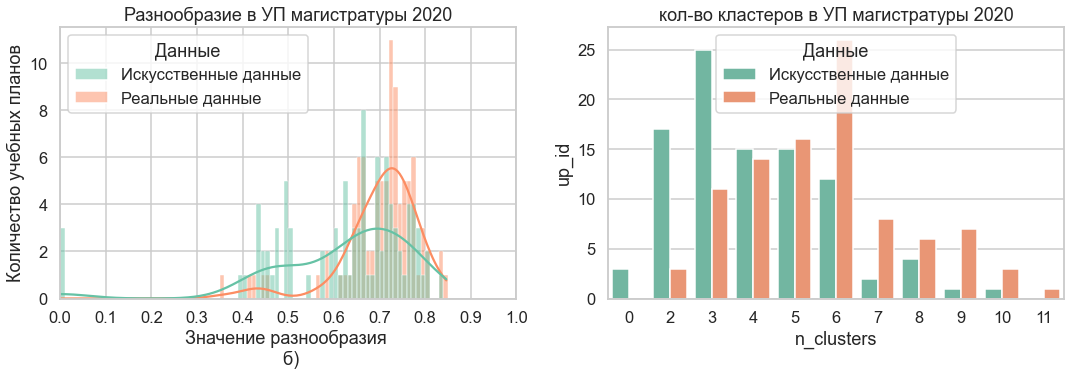

In [446]:
ids = up_mas_2020.up_id.tolist()
random.shuffle(ids)
up_mas_2020["up_id_rand"] = ids

d_gr_fake_2020_mas_plan = calculate_diversity(up_mas_2020, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2020_mas_plan.sample(2))

d_gr_fake_2020_mas_plan["rf"] = "Искусственные данные"
rf2020_mas_plan = pd.concat([d_gr_real_2020_mas, d_gr_fake_2020_mas_plan])
rf2020_mas_plan.rename(columns={"rf": "Данные"}, inplace=True)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"Разнообразие в УП магистратуры 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].set_ylabel("Количество учебных планов")
axis[0].set_xlabel("Значение разнообразия \n б)")
sns.histplot(ax=axis[0], data=rf2020_mas_plan.sort_values(by="Данные"), x="diversity", kde=True, binwidth=0.01, hue="Данные")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2020")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2020_mas_plan.groupby(["n_clusters", "Данные"])["up_id"].count().reset_index().sort_values(by="Данные"), x="n_clusters", y="up_id", hue="Данные");

In [447]:
rf2020_mas_plan

up_id                                           up_title n_courses  \
0   6873                               Научная коммуникация        19   
1   6874                        Цифровые системы управления        45   
2   6892                  Цифровые технологии умного города        20   
3   6916  Стандартизация и метрология в высокотехнологич...        18   
4   6931  Промышленные холодильные системы и тепловые на...        13   
..   ...                                                ...       ...   
90  7329          Качество и безопасность пищевых продуктов        14   
91  7331                                  Прикладная оптика        21   
92  7332                            Инновационный маркетинг        18   
93  7333    Техника и технологии сжиженного природного газа        37   
94  7339  Информационные системы для экологической и тех...        78   

   n_clusters  modularity  diversity  inside_distance                Данные  \
0           5       0.583   0.651369         0.675298       Реальные данные   
1          10       0.638   0.777923         0.718596       Реальные данные   
2           5       0.406   0.763008         0.735491       Реальные данные   
3           5       0.568   0.762480         0.747490       Реальные данные   
4           4       0.272   0.727375         0.832760       Реальные данные   
..        ...         ...        ...              ...                   ...   
90          3       0.444   0.597658         0.456531  Искусственные данные   
91          5       0.460   0.750827         0.543099  Искусственные данные   
92          3       0.133   0.666082         0.598961  Искусственные данные   
93          7       0.625   0.808946         0.704193  Искусственные данные   
94          9       0.769   0.772884         0.575302  Искусственные данные   

       Год  
0   2020.0  
1   2020.0  
2   2020.0  
3   2020.0  
4   2020.0  
..     ...  
90     NaN  
91     NaN  
92     NaN  
93     NaN  
94     NaN  

[190 rows x 9 columns]

In [449]:
print(rf2020_mas_plan.query("Данные == 'Реальные данные'").diversity.quantile(0.25))
print(rf2020_mas_plan.query("Данные == 'Искусственные данные'").diversity.quantile(0.25))
print(rf2020_mas_plan.query("Данные == 'Реальные данные'").diversity.quantile(0.75))
print(rf2020_mas_plan.query("Данные == 'Искусственные данные'").diversity.quantile(0.75))

0.6640354658350297
0.5030932457516725
0.7544536111679567
0.7208048037365565


#### 2021

up_id               up_title n_courses n_clusters  modularity  diversity  \
48  7133  Водородная энергетика        37          7       0.632   0.740269   
27  7106   Управление качеством        38          6       0.486   0.694008   

    inside_distance  
48         0.464567  
27         0.418034

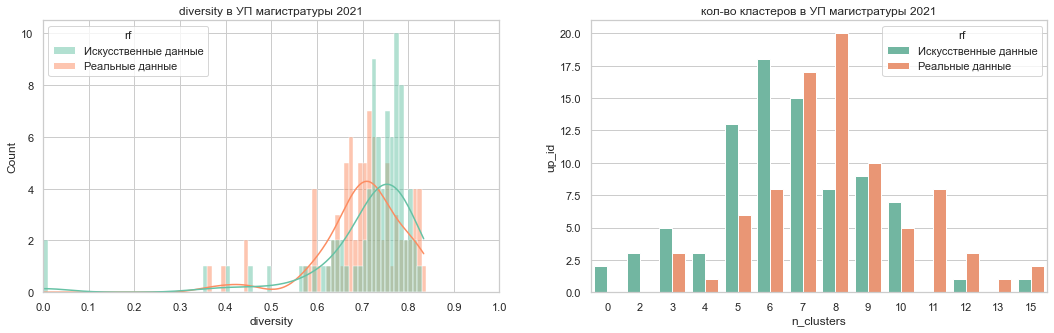

In [108]:
ids = up_mas_2021.up_id.tolist()
random.shuffle(ids)
up_mas_2021["up_id_rand"] = ids

d_gr_fake_2021_mas_plan = calculate_diversity(up_mas_2021, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2021_mas_plan.sample(2))

d_gr_fake_2021_mas_plan["rf"] = "Искусственные данные"
rf2021_mas_plan = pd.concat([d_gr_real_2021_mas, d_gr_fake_2021_mas_plan])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021_mas_plan.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2021")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2021_mas_plan.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022

up_id                                           up_title n_courses  \
78  7277  Химия и искусственный интеллект / Chemistry an...        60   
32  7206  Стратегическое управление интеллектуальной соб...        71   

   n_clusters  modularity  diversity  inside_distance  
78          9       0.685   0.768445         0.627635  
32          8       0.620   0.769086         0.632671

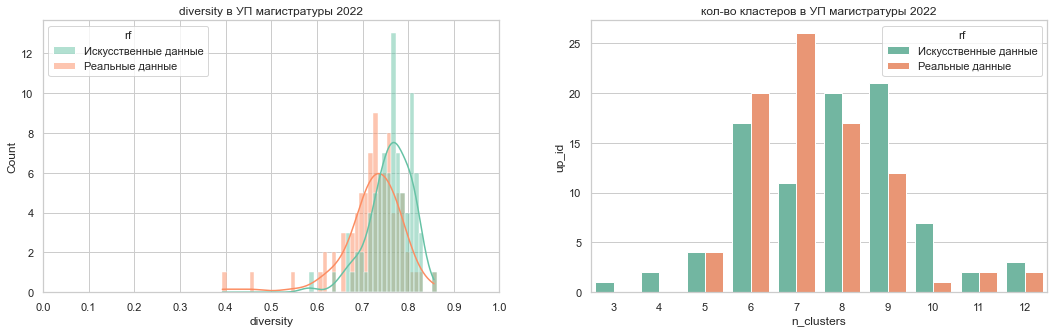

In [104]:
ids = up_mas_2022.up_id.tolist()
random.shuffle(ids)
up_mas_2022["up_id_rand"] = ids

d_gr_fake_2022_mas_plan = calculate_diversity(up_mas_2022, "up_id_rand", "comb_res", "embed")
display(d_gr_fake_2022_mas_plan.sample(2))

d_gr_fake_2022_mas_plan["rf"] = "Искусственные данные"
rf2022_mas_plan = pd.concat([d_gr_real_2022_mas, d_gr_fake_2022_mas_plan])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022_mas_plan.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП магистратуры 2022")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2022_mas_plan.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

## Перетасовка кластеров

In [326]:

def get_clusters(up):
   up_groups = up.groupby(["up_id"])
   idx = range(len(up_groups))

   df_clusters = pd.DataFrame(columns=["up_id"]+list(range(50)))
   up_extras = {}

   for i, _group in zip(idx, up_groups):
      try:
            up_id, group = _group
            up_extras[up_id] = []

            # создание графа УП
            gr = group[["up_id", "course_id"]]
            gr = pd.merge(gr, gr, on="up_id").drop_duplicates()
            gr = gr[gr["course_id_x"]!=gr["course_id_y"]].reset_index(drop=True)
            ents = group[["course_id", "comb_res"]]
            gr = pd.merge(gr, ents, left_on="course_id_x", right_on="course_id")
            gr = pd.merge(gr, ents, left_on="course_id_y", right_on="course_id")
            gr.columns = ['up_id', 'course_id_x_', 'course_id_y_', 'course_id_x', 'comb_res_x',
               'course_id_y', 'comb_res_y']
            gr.drop_duplicates(inplace=True, subset=['course_id_x_', 'course_id_y_', 'course_id_x', 'course_id_y'])
            gr["weight"] = gr.apply(lambda row: len(set(row["comb_res_x"]).intersection(row["comb_res_y"])), axis=1)

            pairs = gr[gr.weight > 0][["course_id_x", "course_id_y", "weight"]]
            pairs = pairs.values.tolist()
            set_of_pairs = set()
            for word1, word2, weight in pairs:
               first, second = sorted([word1, word2])
               set_of_pairs.add((first, second, weight))
            list_of_pairs = list(set_of_pairs)

            G = nx.Graph()
            G.add_weighted_edges_from(list_of_pairs)

            # кластеризация графа
            if len(G.edges) > 0:
               communities = community_louvain.best_partition(G)
               nx.set_node_attributes(G, communities, 'modularity')
               modularity_score = round(community_louvain.modularity(communities, G), 3)

               modul = {}
               for k, v in communities.items():
                  if v not in modul:
                     modul[v] = [k]
                  else:
                     modul[v].append(k)

               # print(modul)
               # break
               modul1 = {}
               for k, v in modul.items():
                  if len(v) >= 2:
                     modul1[k] = v

               
               modularity = dict.fromkeys(range(len(modul1)))
               for k in modularity.keys():
                  to_save = modul1.popitem()
                  modularity[k] = to_save[1]


               # распределение изолированных вершин по кластерам
               in_graph = []
               embeds = {}
               for cl, discs in modularity.items():
                  data = pd.DataFrame(group[group.course_id.isin(discs)].embed.tolist()).dropna()
                  data["embed"] = data.apply(lambda row: np.array(row), axis=1)
                  embeds[cl] = data["embed"].mean()
                  in_graph.extend(discs)
               
               not_in_graph = group[~group.course_id.isin(in_graph)].course_id.values

               extras = []
               # print(embeds.keys())
               for vert in not_in_graph:
                  cl, sim = most_similar_cluster(group[group.course_id == vert].embed.values[0], embeds)
                  if sim >= 0.3 and sim < 1:
                     # print(sim, cl)
                     modularity[cl] += [vert]
                  else:
                     extras.append(vert)
               modularity[max(modularity.keys())+1] = extras
               up_extras[up_id].extend(extras)

               # print(modularity)
               row = df_clusters.shape[0]
               df_clusters.loc[df_clusters.shape[0], "up_id"] = up_id
               for cl, courses in modularity.items():
                  df_clusters.loc[row, cl] = courses

               # display(df_clusters)
               # break

               
               
               
            # df_clusters = df_clusters.append(up_clusters).reset_index(drop=True)
      except ValueError:
         pass
   

   # display(up_extras)
   df_rand_clusters = pd.DataFrame(df_clusters.up_id)

   for i in range(50):
      col = df_clusters[i].copy()
      random.shuffle(col)
      df_rand_clusters[i] = col


   return df_rand_clusters, df_clusters, up_extras


def calculate_only_diversity(df_rand_clusters):
   modularity_score = 0
   d_gr_clusters = pd.DataFrame(columns=[0,1,2,3,4,5])
   inside_sim = {}

   for i in df_rand_clusters.index.values:
      up_id = df_rand_clusters.up_id.iloc[i]
      group = up.loc[up.up_id == up_id]
      disc_clusters = df_rand_clusters.iloc[i, 1:].dropna().tolist()

      diversity = []
      embeds = {}
      inside_sim[up_id] = {}
      
      discipline_similarity = []
      for cl, discs in enumerate(disc_clusters):
         data = pd.DataFrame(up[up.course_id.isin(discs)].drop_duplicates(subset=["course_id"]).embed.tolist()).dropna()
         data["embed"] = data.apply(lambda row: np.array(row), axis=1)
         
         
         if not np.isnan(data["embed"].mean()).any():
               embeds[cl] = data["embed"].mean()
         

         sim_matrix = calculate_cosine_similarity(data["embed"].tolist())
         mean_similarity = np.mean(sim_matrix)
         inside_sim[up_id][cl] = mean_similarity
         
         discipline_similarity.append(mean_similarity)
      
      discipline_similarity = np.array(discipline_similarity)
      discipline_similarity = discipline_similarity[~np.isnan(discipline_similarity)]
      
      # расчет среднего внутрикластерного расстояния
      distance_inside_clusters = np.mean(discipline_similarity)
      

      # оценка расстояния между кластерами
      # if not np.isnan(embeds.values()).any():
      cosine_distances = calculate_cosine_distance(list(embeds.values()))
      distances = np.mean(cosine_distances)
      
      # display(inside_sim)

      diversity.append([up_id, group.up_title.iloc[0], group.shape[0], len(disc_clusters), 
                           modularity_score, distances, distance_inside_clusters])

      d_gr_clusters = d_gr_clusters.append(diversity).reset_index(drop=True)

   d_gr_clusters.columns = ["up_id", "up_title", "n_courses", "n_clusters", "modularity", "diversity", "inside_distance"]

   return d_gr_clusters, inside_sim

### Бакалавриат

#### 2018 год

In [ ]:
up_bac_2018["random_res"] = up_bac_2018.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2018["random_embed"] = up_bac_2018.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

In [ ]:
d_gr_real_2018 = calculate_diversity(up_bac_2018, "up_id", "comb_res", "embed")
display(d_gr_real_2018.sample(2))

d_gr_fake_2018 = calculate_diversity(up_bac_2018, "up_id", "random_res", "random_embed")
display(d_gr_fake_2018.sample(2))

up_id                          up_title n_courses n_clusters  modularity  \
7   6867  Прикладная и компьютерная оптика        26          4       0.424   
24  6895     Вычислительные системы и сети        42          7       0.431   

    diversity  inside_distance  
7    0.630968         0.402001  
24   0.665650         0.373508

up_id                           up_title n_courses n_clusters  modularity  \
24  6895      Вычислительные системы и сети        42         11       0.888   
29  6900  Управление в технических системах        20          3       0.444   

    diversity  inside_distance  
24   0.549998         0.557524  
29   0.382063         0.362957

In [ ]:
d_gr_real_2018["rf"] = "Реальные данные"
d_gr_fake_2018["rf"] = "Искусственные данные"
rf2018 = pd.concat([d_gr_real_2018, d_gr_fake_2018])
rf2018.sample(2)

up_id                        up_title n_courses n_clusters  modularity  \
32  6903    Инфокоммуникационные системы        37          6       0.735   
31  6902  Мобильные и сетевые технологии        32          7       0.626   

    diversity  inside_distance                    rf  
32   0.511203         0.465207  Искусственные данные  
31   0.783394         0.639574       Реальные данные

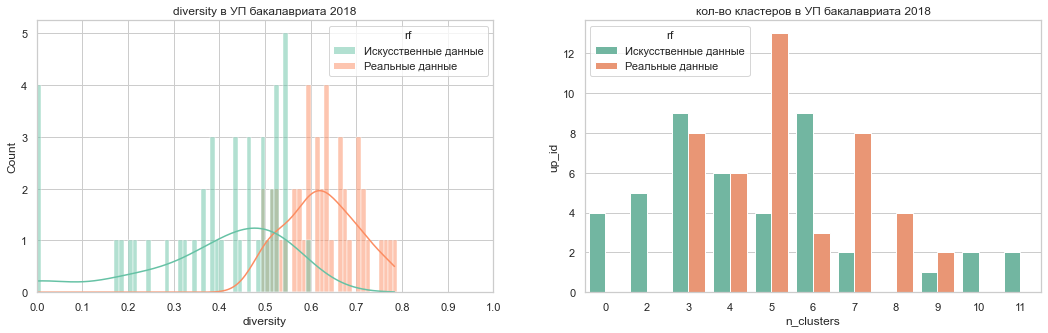

In [ ]:
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2018")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2018.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2018")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2018.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2019 год

up_id                                 up_title n_courses n_clusters  \
43  7346          Нанофотоника и квантовая оптика        47          9   
37  7310  Низкотемпературная техника и энергетика        22          3   

    modularity  diversity  inside_distance               rf  
43       0.603   0.613275         0.533947  Реальные данные  
37       0.227   0.493239         0.461125  Реальные данные

up_id                                up_title n_courses n_clusters  \
43  7346         Нанофотоника и квантовая оптика        47          7   
34  6905  Программирование и интернет-технологии        33          6   

    modularity  diversity  inside_distance                    rf  
43       0.816   0.547763         0.420424  Искусственные данные  
34       0.750   0.465183         0.461182  Искусственные данные

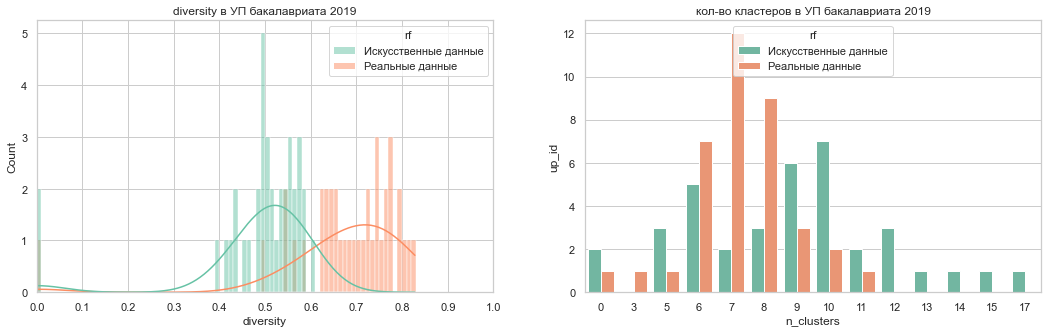

In [ ]:
up_bac_2019["random_res"] = up_bac_2019.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2019["random_embed"] = up_bac_2019.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2019 = calculate_diversity(up_bac_2019, "up_id", "comb_res", "embed")
display(d_gr_real_2018.sample(2))

d_gr_fake_2019 = calculate_diversity(up_bac_2019, "up_id", "random_res", "random_embed")
display(d_gr_fake_2018.sample(2))

d_gr_real_2019["rf"] = "Реальные данные"
d_gr_fake_2019["rf"] = "Искусственные данные"
rf2019 = pd.concat([d_gr_real_2019, d_gr_fake_2019])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2019")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2019.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2019")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2019.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2020 год

up_id                        up_title n_courses n_clusters  modularity  \
1   6886                    Биоинженерия        48          9       0.663   
19  7035  Мобильные и сетевые технологии        42          9       0.514   

    diversity  inside_distance  
1    0.701761         0.511997  
19   0.778232         0.576230

up_id                                          up_title n_courses  \
32  7312           Низкотемпературная техника и энергетика        48   
16  6989  Программирование в инфокоммуникационных системах        48   

   n_clusters  modularity  diversity  inside_distance  
32         10       0.857   0.587761         0.493837  
16         10       0.763   0.488272              NaN

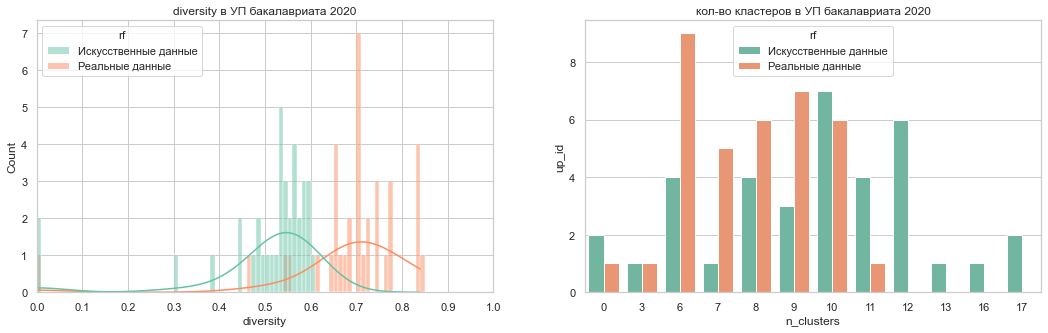

In [ ]:
up_bac_2020["random_res"] = up_bac_2020.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2020["random_embed"] = up_bac_2020.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2020 = calculate_diversity(up_bac_2020, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2020 = calculate_diversity(up_bac_2020, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2020["rf"] = "Реальные данные"
d_gr_fake_2020["rf"] = "Искусственные данные"
rf2020 = pd.concat([d_gr_real_2020, d_gr_fake_2020])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2020")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2020.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2021 год

up_id                              up_title n_courses n_clusters  \
28  7095           Цифровые системы управления        11          3   
35  7345  Оптико-электронные приборы и системы        44          6   

    modularity  diversity  inside_distance               rf  
28       0.375   0.543483         0.442246  Реальные данные  
35       0.507   0.613729         0.362604  Реальные данные

up_id                                       up_title n_courses n_clusters  \
29  7103  Иностранные языки и информационные технологии        45          6   
24  7079              Компьютерные технологии в дизайне        60          8   

    modularity  diversity  inside_distance                    rf  
29       0.750   0.483498         0.368478  Искусственные данные  
24       0.777   0.488638         0.362782  Искусственные данные

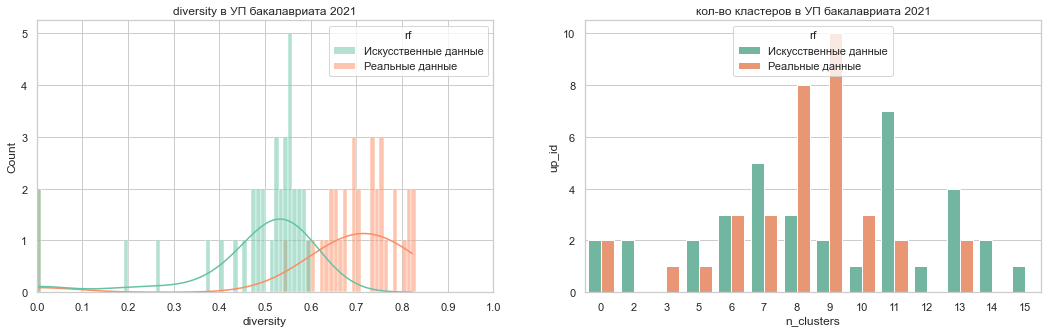

In [ ]:
up_bac_2021["random_res"] = up_bac_2021.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2021["random_embed"] = up_bac_2021.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2021 = calculate_diversity(up_bac_2021, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2021 = calculate_diversity(up_bac_2021, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2021["rf"] = "Реальные данные"
d_gr_fake_2021["rf"] = "Искусственные данные"
rf2021 = pd.concat([d_gr_real_2021, d_gr_fake_2021])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2021")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2021.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022 год

up_id                      up_title n_courses n_clusters  modularity  \
7   6972  Технологии защиты информации        68         10       0.464   
17  6990    Фотоника и оптоинформатика        25          6       0.547   

    diversity  inside_distance               rf  
7    0.832520         0.587834  Реальные данные  
17   0.682811         0.547054  Реальные данные

up_id                      up_title n_courses n_clusters  modularity  \
1  6886                  Биоинженерия        48          7       0.793   
7  6972  Технологии защиты информации        68         12       0.893   

   diversity  inside_distance                    rf  
1   0.483215         0.387757  Искусственные данные  
7   0.555740         0.484731  Искусственные данные

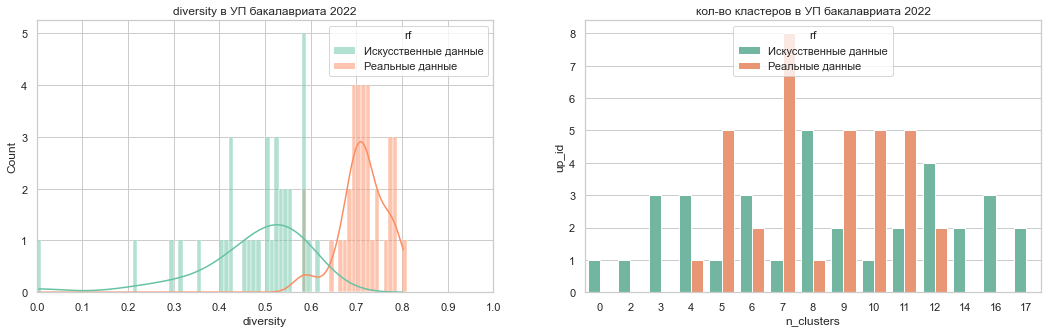

In [ ]:
up_bac_2022["random_res"] = up_bac_2022.apply(lambda row: random.sample(res_options, row["comb_res_n"]), axis=1)
up_bac_2022["random_embed"] = up_bac_2022.random_res.apply(lambda row: Discipline(row, dict_clusters).norm_vector)

d_gr_real_2022 = calculate_diversity(up_bac_2022, "up_id", "comb_res", "embed")
display(d_gr_real_2020.sample(2))

d_gr_fake_2022 = calculate_diversity(up_bac_2022, "up_id", "random_res", "random_embed")
display(d_gr_fake_2020.sample(2))

d_gr_real_2022["rf"] = "Реальные данные"
d_gr_fake_2022["rf"] = "Искусственные данные"
rf2022 = pd.concat([d_gr_real_2022, d_gr_fake_2022])

# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2022")
# axis[1].set_xticks(np.arange(0,12,1))
# axis[1].set_xlim(0,12)
sns.barplot(rf2022.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

### Бакалавриат

#### 2018

up_id                                        up_title n_courses n_clusters  \
2   6862         Низкотемпературная техника и энергетика        51          5   
27  6898  Системное и прикладное программное обеспечение        83          5   

   modularity  diversity  inside_distance  
2           0   0.541973         0.526417  
27          0   0.665978         0.399301

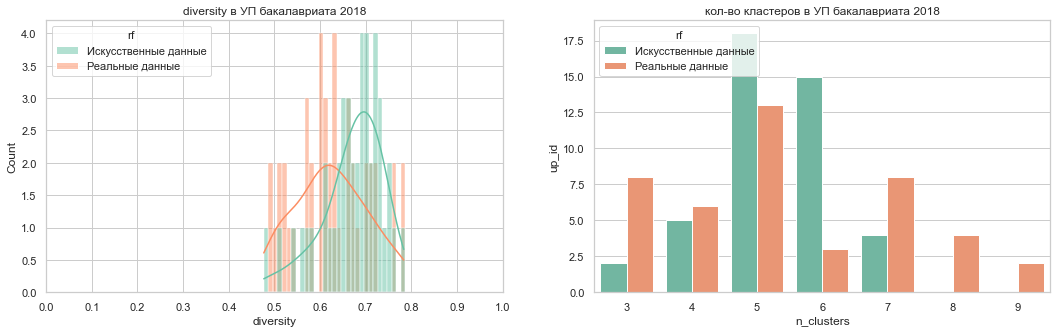

In [261]:
fake_clusters_2018, _, _ = get_clusters(up_bac_2018)
fake_clusters_2018, _ = calculate_only_diversity(fake_clusters_2018)

display(fake_clusters_2018.sample(2))

fake_clusters_2018["rf"] = "Искусственные данные"
rf2018_clust = pd.concat([d_gr_real_2018, fake_clusters_2018])
rf2018_clust.sample(2)
# оценка diversity и кол-ва кластеров
sns.set_palette("Set2")
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2018")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2018_clust.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2018")
sns.barplot(rf2018_clust.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2019

up_id                                       up_title n_courses n_clusters  \
32  7315         Информационные технологии в энергетике       105          6   
23  6940  Интеллектуальные системы в гуманитарной сфере       100          8   

   modularity  diversity  inside_distance  
32          0   0.743429         0.554715  
23          0   0.775549         0.543074

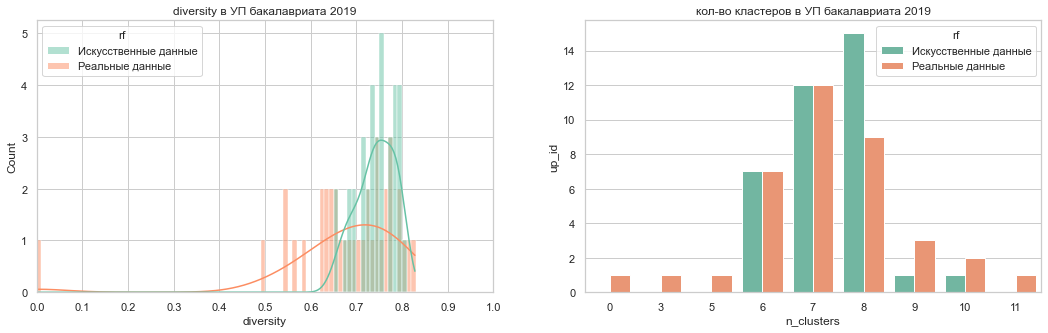

In [262]:
fake_clusters_2019,_,_ = get_clusters(up_bac_2019)
fake_clusters_2019,_ = calculate_only_diversity(fake_clusters_2019)

display(fake_clusters_2019.sample(2))

fake_clusters_2019["rf"] = "Искусственные данные"
rf2019_clust = pd.concat([d_gr_real_2019, fake_clusters_2019])
rf2019_clust.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2019")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2019_clust.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2019")
sns.barplot(rf2019_clust.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2020

up_id                                       up_title n_courses n_clusters  \
25  7081  Интеллектуальные системы в гуманитарной сфере       105          8   
29  7304            Лазерная фотоника и оптоэлектроника       111          8   

   modularity  diversity  inside_distance  
25          0   0.777348         0.580788  
29          0   0.701693         0.557531

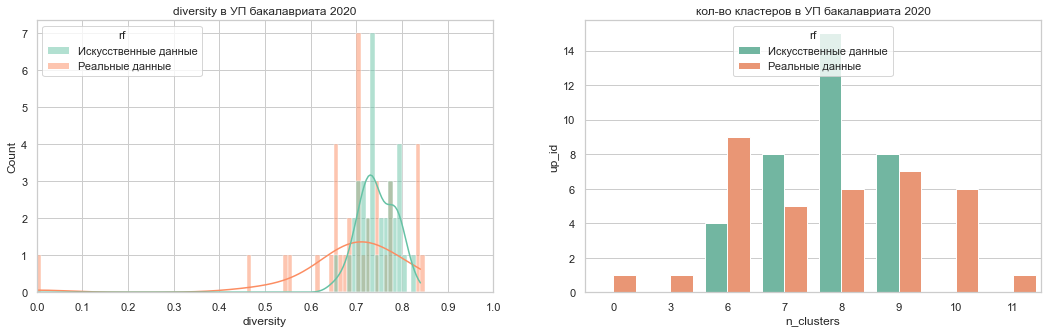

In [263]:
fake_clusters_2020,_,_ = get_clusters(up_bac_2020)
fake_clusters_2020,_ = calculate_only_diversity(fake_clusters_2020)

display(fake_clusters_2020.sample(2))

fake_clusters_2020["rf"] = "Искусственные данные"
rf2020_clust = pd.concat([d_gr_real_2020, fake_clusters_2020])
rf2020_clust.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020_clust.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2020")
sns.barplot(rf2020_clust.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2021

up_id                                up_title n_courses n_clusters  \
23  7147       Компьютерные технологии в дизайне       117          7   
22  7146  Программирование и интернет-технологии        84          8   

   modularity  diversity  inside_distance  
23          0   0.705322         0.683453  
22          0   0.601547         0.471951

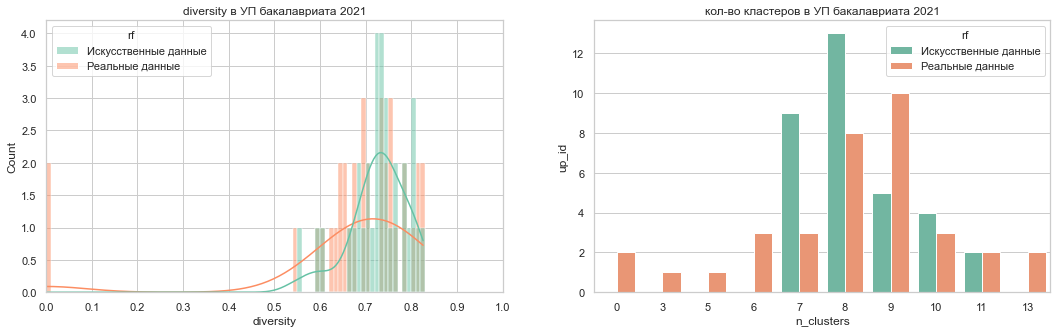

In [264]:
fake_clusters_2021,_,_ = get_clusters(up_bac_2021)
fake_clusters_2021,_ = calculate_only_diversity(fake_clusters_2021)

display(fake_clusters_2021.sample(2))

fake_clusters_2021["rf"] = "Искусственные данные"
rf2021_clust = pd.concat([d_gr_real_2021, fake_clusters_2021])
rf2021_clust.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021_clust.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2021")
sns.barplot(rf2021_clust.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022

up_id                                           up_title n_courses  \
20  7246  Иностранные языки и информационные технологии ...        65   
27  7286            Робототехника и искусственный интеллект       110   

   n_clusters modularity  diversity  inside_distance  
20          7          0   0.672264         0.387715  
27          9          0   0.736925         0.422727

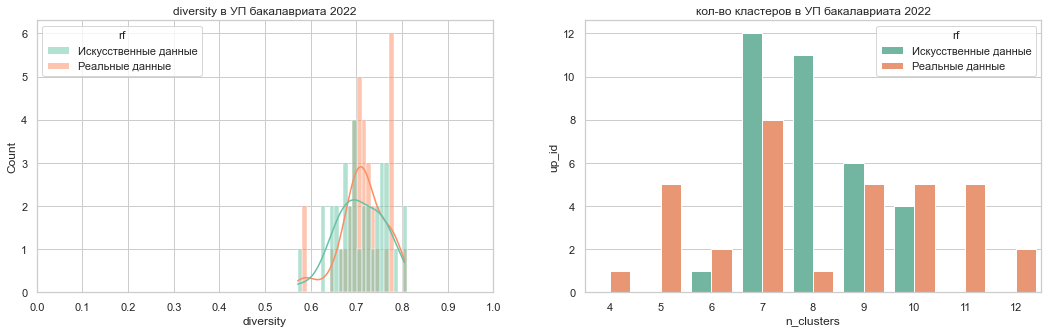

In [276]:
fake_clusters_2022,_,_ = get_clusters(up_bac_2022)
fake_clusters_2022,_ = calculate_only_diversity(fake_clusters_2022)

display(fake_clusters_2022.sample(2))

fake_clusters_2022["rf"] = "Искусственные данные"
rf2022_clust = pd.concat([d_gr_real_2022, fake_clusters_2022])
rf2022_clust.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП бакалавриата 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022_clust.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2022")
sns.barplot(rf2022_clust.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

### Магистратура

#### 2020

up_id                                           up_title n_courses  \
91  7331  Информационные системы для экологической и тех...        28   
27  7010                            Оптико-цифровые системы        21   

   n_clusters modularity  diversity  inside_distance  
91          6          0   0.754475         0.780155  
27          6          0   0.713672              NaN

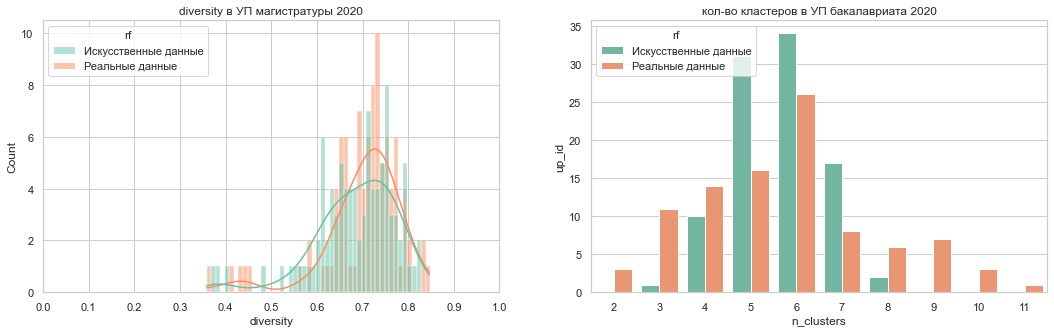

In [278]:
fake_clusters_2020_mas,_,_ = get_clusters(up_mas_2020)
fake_clusters_2020_mas,_ = calculate_only_diversity(fake_clusters_2020_mas)

display(fake_clusters_2020_mas.sample(2))

fake_clusters_2020_mas["rf"] = "Искусственные данные"
rf2020_clust_mas = pd.concat([d_gr_real_2020_mas, fake_clusters_2020_mas])
rf2020_clust_mas.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2020")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2020_clust_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2020")
sns.barplot(rf2020_clust_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2021

up_id                                           up_title n_courses  \
51  7144  Биоинженерия и биотехнические системы / Bioeng...        66   
70  7301        Математическое и компьютерное моделирование        40   

   n_clusters modularity  diversity  inside_distance  
51          8          0   0.821310              NaN  
70          7          0   0.709069         0.815825

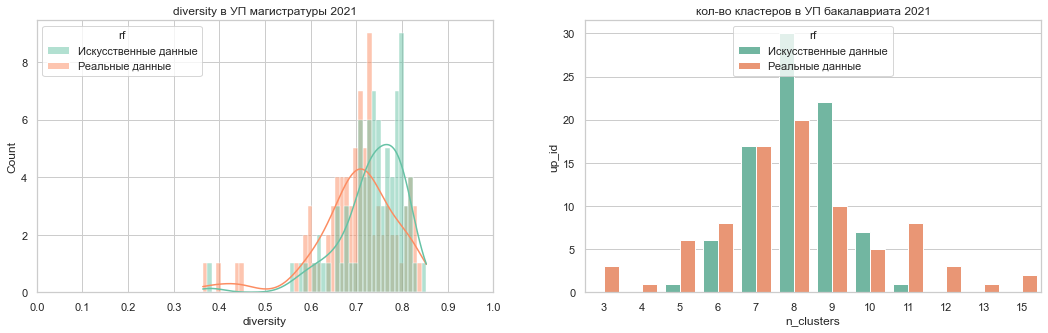

In [267]:
fake_clusters_2021_mas,_,_ = get_clusters(up_mas_2021)
fake_clusters_2021_mas,_ = calculate_only_diversity(fake_clusters_2021_mas)

display(fake_clusters_2021_mas.sample(2))

fake_clusters_2021_mas["rf"] = "Искусственные данные"
rf2021_clust_mas = pd.concat([d_gr_real_2021_mas, fake_clusters_2021_mas])
rf2021_clust_mas.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2021")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2021_clust_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2021")
sns.barplot(rf2021_clust_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

#### 2022

up_id                                           up_title n_courses  \
30  7203                 Цифровые технологии в производстве        87   
54  7252  Цифровые методы в гуманитарных исследованиях /...        76   

   n_clusters modularity  diversity  inside_distance  
30          6          0   0.663921         0.661606  
54          7          0   0.748070         0.595662

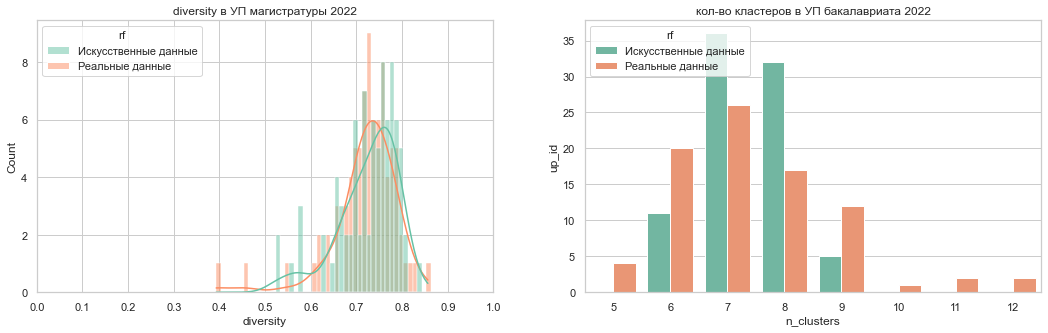

In [268]:
fake_clusters_2022_mas,_,_ = get_clusters(up_mas_2022)
fake_clusters_2022_mas,_ = calculate_only_diversity(fake_clusters_2022_mas)

display(fake_clusters_2022_mas.sample(2))

fake_clusters_2022_mas["rf"] = "Искусственные данные"
rf2022_clust_mas = pd.concat([d_gr_real_2022_mas, fake_clusters_2022_mas])
rf2022_clust_mas.sample(2)
# оценка diversity и кол-ва кластеров
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП магистратуры 2022")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=rf2022_clust_mas.sort_values(by="rf"), x="diversity", kde=True, binwidth=0.01, hue="rf")

axis[1].set_title(f"кол-во кластеров в УП бакалавриата 2022")
sns.barplot(rf2022_clust_mas.groupby(["n_clusters", "rf"])["up_id"].count().reset_index().sort_values(by="rf"), x="n_clusters", y="up_id", hue="rf");

## Если удалить подозрительные кластеры

In [288]:
_,df_uncommon_clusters,df_extras = get_clusters(up_uncommon)
df_diversity,df_inside_sim = calculate_only_diversity(df_uncommon_clusters)


In [291]:
df_diversity = pd.merge(df_diversity, up_uncommon[["up_id", "year", "qualification"]], left_on="up_id", right_on="up_id").drop_duplicates(subset=["up_id"])
df_diversity["qualification"] = df_diversity.qualification.apply(lambda x: "master" if x == "master" else "bachelor")
display(df_diversity)

up_id                                           up_title n_courses  \
0      6859                    Нанофотоника и квантовая оптика        77   
47     6860             Информационные технологии в энергетике        75   
94     6861  Молекулярная биология и биотехнология / Molecu...        25   
108    6862            Низкотемпературная техника и энергетика        51   
130    6863                           Экологический инжиниринг        51   
...     ...                                                ...       ...   
19309  7347  Оптико-электронные информационно-измерительные...        94   
19348  7348                                  Прикладная оптика       108   
19400  7349  Биоинформатика и системная биология / Bioinfor...        29   
19418  7350  Разработка программного обеспечения / Software...        31   
19444  7351                              Водородная энергетика        41   

      n_clusters modularity  diversity  inside_distance  year qualification  
0              9          0   0.613275         0.533947  2018      bachelor  
47             7          0   0.673858         0.516951  2018      bachelor  
94             3          0   0.398848         0.890782  2021        master  
108            3          0   0.493239         0.461125  2018      bachelor  
130            3          0   0.520471         0.518674  2018      bachelor  
...          ...        ...        ...              ...   ...           ...  
19309          6          0   0.650496         0.375528  2019      bachelor  
19348          7          0   0.669109         0.457875  2019      bachelor  
19400          5          0   0.363481         0.744408  2021        master  
19418          8          0   0.771106         0.772259  2021        master  
19444          7          0   0.753111         0.649180  2021        master  

[445 rows x 9 columns]

In [302]:
df_diversity_test0 = calculate_diversity(up=up_uncommon, up_id_title="up_id", res_title="comb_res", embed_title="embed")

In [304]:
df_diversity_test0

up_id                                           up_title n_courses  \
0    6859                    Нанофотоника и квантовая оптика        47   
1    6860             Информационные технологии в энергетике        47   
2    6861  Молекулярная биология и биотехнология / Molecu...        14   
3    6862            Низкотемпературная техника и энергетика        22   
4    6863                           Экологический инжиниринг        23   
..    ...                                                ...       ...   
444  7347  Оптико-электронные информационно-измерительные...        39   
445  7348                                  Прикладная оптика        52   
446  7349  Биоинформатика и системная биология / Bioinfor...        18   
447  7350  Разработка программного обеспечения / Software...        26   
448  7351                              Водородная энергетика        30   

    n_clusters  modularity  diversity  inside_distance  
0            9       0.603   0.613275         0.533947  
1            7       0.578   0.673858         0.516951  
2            3       0.264   0.398848         0.890782  
3            3       0.227   0.493239         0.461125  
4            3       0.444   0.520471         0.518674  
..         ...         ...        ...              ...  
444          6       0.344   0.650496         0.375528  
445          7       0.395   0.674367         0.482565  
446          5       0.463   0.363481         0.744408  
447          8       0.696   0.771106         0.772259  
448          7       0.713   0.753111         0.649180  

[449 rows x 7 columns]

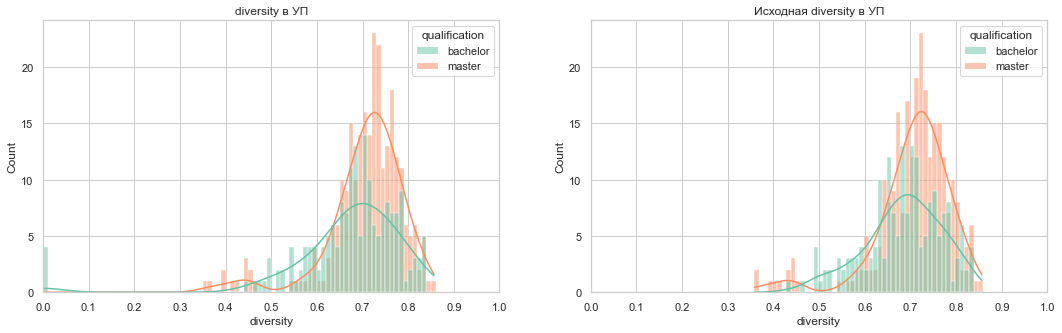

In [305]:
df_diversity_test0 = pd.merge(df_diversity_test0, up_uncommon[["up_id", "year", "qualification"]], left_on="up_id", right_on="up_id").drop_duplicates(subset=["up_id"])
df_diversity_test0["qualification"] = df_diversity_test0.qualification.apply(lambda x: "master" if x == "master" else "bachelor")


# визуализация
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=df_diversity_test0, x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[1].set_title(f"Исходная diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
sns.histplot(ax=axis[1], data=df_diversity, x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

#### Без дисциплин, которые не распределяются по кластерам

In [294]:
up_uncommon_extras = up_uncommon.copy()
print(up_uncommon.shape)

for up_id, extras in df_extras.items():
    up_uncommon_extras = up_uncommon_extras.loc[~((up_uncommon_extras.up_id == up_id)&(up_uncommon_extras.course_id.isin(extras)))]

print(up_uncommon_extras.shape)

(19784, 29)
(17544, 29)


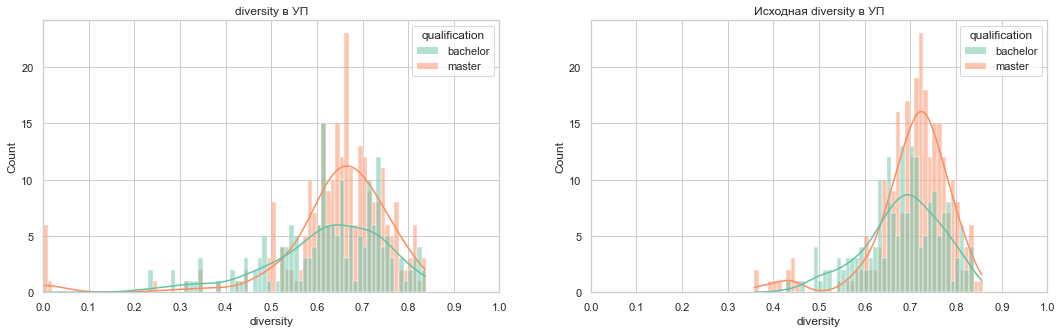

In [327]:
_,df_uncommon_clusters_test1,_ = get_clusters(up_uncommon_extras)
df_diversity_test1,_ = calculate_only_diversity(df_uncommon_clusters_test1)

df_diversity_test1 = pd.merge(df_diversity_test1, up_uncommon_extras[["up_id", "year", "qualification"]], left_on="up_id", right_on="up_id").drop_duplicates(subset=["up_id"])
df_diversity_test1["qualification"] = df_diversity_test1.qualification.apply(lambda x: "master" if x == "master" else "bachelor")

# визуализация
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=df_diversity_test1, x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[1].set_title(f"Исходная diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
sns.histplot(ax=axis[1], data=df_diversity, x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

In [180]:
df_diversity_test1["Квалификация"] = df_diversity_test1["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")
df_diversity["Квалификация"] = df_diversity["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")


# визуализация только для планов, где больше 50 дисциплин
fig, axis = plt.subplots(2, 1, figsize=(18, 7))

axis[0].set_title(f"Разнообразие в УП, где больше 50 дисциплин")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].axvline(df_diversity_test1.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[1].set_ylabel("Без распределения")
axis[1].set_xlabel("")
sns.histplot(ax=axis[1], data=df_diversity_test1.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")

axis[1].set_title(f"")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[0].set_ylabel("С распределением")
axis[1].set_xlabel("Значение разнообразия")
sns.histplot(ax=axis[0], data=df_diversity.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")
plt.show()

NameError: name 'df_diversity_test1' is not defined

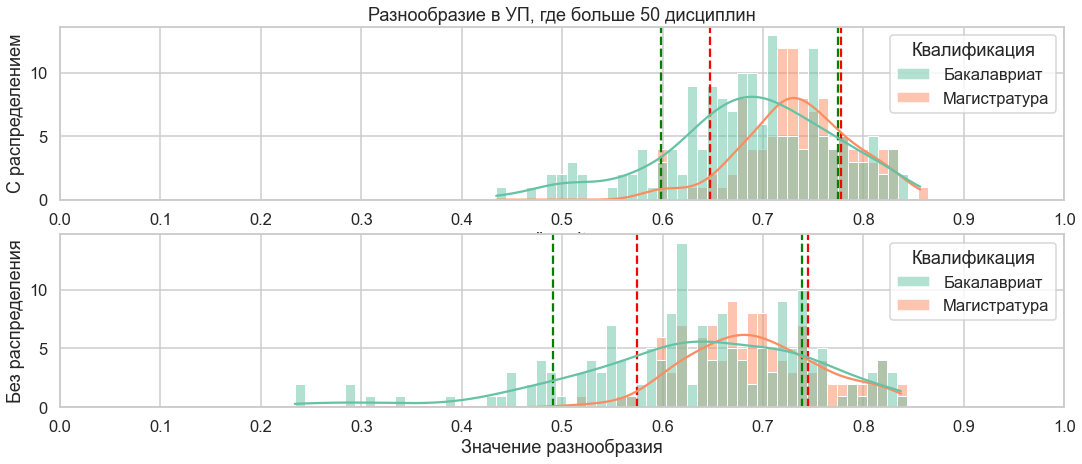

In [459]:
df_diversity_test1["Квалификация"] = df_diversity_test1["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")
df_diversity["Квалификация"] = df_diversity["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")


# визуализация только для планов, где больше 50 дисциплин
fig, axis = plt.subplots(2, 1, figsize=(18, 7))

axis[0].set_title(f"Разнообразие в УП, где больше 50 дисциплин")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].axvline(df_diversity_test1.query("qualification=='master'").diversity.quantile(0.15), color='red', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='master'").diversity.quantile(0.85), color='red', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='bachelor'").diversity.quantile(0.15), color='green', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='bachelor'").diversity.quantile(0.85), color='green', linestyle='--')
axis[1].set_ylabel("Без распределения")
axis[1].set_xlabel("")
sns.histplot(ax=axis[1], data=df_diversity_test1.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")

# axis[1].set_title(f"")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.quantile(0.15), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.quantile(0.85), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.quantile(0.15), color='green', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.quantile(0.85), color='green', linestyle='--')
axis[0].set_ylabel("С распределением")
axis[1].set_xlabel("Значение разнообразия")
sns.histplot(ax=axis[0], data=df_diversity.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")
plt.show()

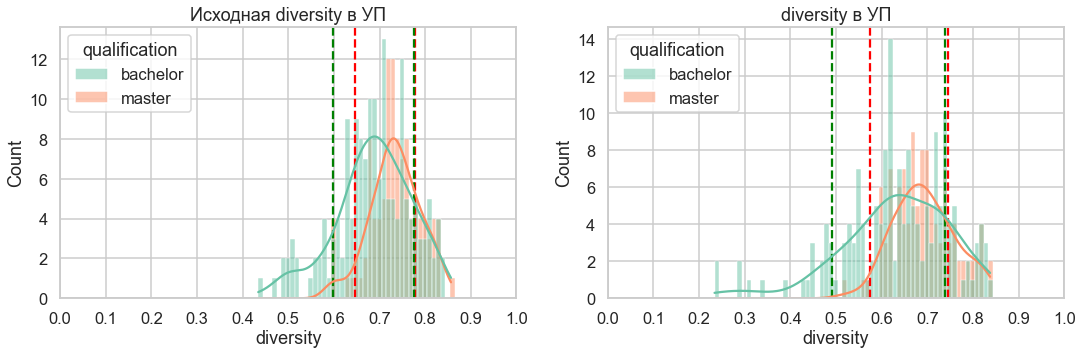

In [457]:
sns.set_palette("Set2")

# визуализация только для планов, где больше 50 дисциплин
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[1].set_title(f"diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].axvline(df_diversity_test1.query("qualification=='master'").diversity.quantile(0.15), color='red', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='master'").diversity.quantile(0.85), color='red', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='bachelor'").diversity.quantile(0.15), color='green', linestyle='--')
axis[1].axvline(df_diversity_test1.query("qualification=='bachelor'").diversity.quantile(0.85), color='green', linestyle='--')
sns.histplot(ax=axis[1], data=df_diversity_test1.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[0].set_title(f"Исходная diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.quantile(0.15), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.quantile(0.85), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.quantile(0.15), color='green', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.quantile(0.85), color='green', linestyle='--')
sns.histplot(ax=axis[0], data=df_diversity.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

После удаления дисциплин, самостоятельно не распределяющихся по кластерам, во-первых, меняются границы распределений, сильно растягиваясь влево. Во-вторых, среднее разнообразие понижается и для бакалавриата, и для магистратуры. Но для магистратуры сильнее.

In [330]:
df_diversity_test1.inside_distance.describe()

count    445.000000
mean       0.658567
std        0.137215
min        0.314274
25%        0.557747
50%        0.662424
75%        0.745405
max        1.000000
Name: inside_distance, dtype: float64

In [329]:
df_diversity_test1.query("n_courses >= 50 & diversity < 0.4")

up_id                                           up_title n_courses  \
90     6862            Низкотемпературная техника и энергетика        51   
207    6870               Квантовые технологии в коммуникациях        58   
509    6882  Технологии транспортирования углеводородных эн...        50   
15932  7310            Низкотемпературная техника и энергетика        51   
15942  7311            Низкотемпературная техника и энергетика       104   
15981  7312            Низкотемпературная техника и энергетика       108   
16020  7313  Технологии транспортирования углеводородных эн...        50   

      n_clusters modularity  diversity  inside_distance  year qualification  
90             3          0   0.233815         0.602641  2018      bachelor  
207            6          0   0.384108         0.723092  2018      bachelor  
509            3          0   0.286685         0.541633  2018      bachelor  
15932          3          0   0.233815         0.602641  2018      bachelor  
15942          5          0   0.337984         0.414242  2019      bachelor  
15981          6          0   0.312576         0.435549  2020      bachelor  
16020          3          0   0.286685         0.541633  2018      bachelor

Интересна, например, ОП "Низкотемпературная техника и энергетика": у нее больше 100 дисциплин, разнообразие меньше 0.4, внутрикластерное расстояние за границами интерквартильного размаха. В принципе то же самое у "Технологий транспортирования...", но у них мало дисциплин, дело может быть в этом.

#### Без кластеров с низким внутрикластерым расстоянием

In [346]:
def loosest_cluster(up_data):
    return min(up_data.items(), key=itemgetter(1))[0]

def densest_cluster(up_data):
    return max(up_data.items(), key=itemgetter(1))[0]

In [341]:
df_uncommon_clusters.loc[df_uncommon_clusters.up_id == 6859, 8]

0    [15431, 7666, 9770, 14009, 3140, 2665, 3497]
Name: 8, dtype: object

In [344]:
df_uncommon_clusters_extra = df_uncommon_clusters.copy()

for up_id, dens in df_inside_sim.items():
    col = loosest_cluster(dens)
    df_uncommon_clusters_extra.loc[df_uncommon_clusters_extra.up_id == up_id, col] = np.nan

df_uncommon_clusters_extra.head(2)

up_id                                       0  \
0  6859                     [8372, 10250, 3151]   
1  6860  [3403, 10364, 3413, 3420, 2665, 14099]   

                                        1                               2  \
0  [3500, 10252, 10960, 9657, 9777, 3496]       [3501, 9772, 3507, 14863]   
1    [3415, 7808, 3411, 3406, 3418, 7556]  [3424, 3410, 3408, 3377, 3387]   

                                                   3  \
0                                       [3485, 3511]   
1  [3421, 3422, 7557, 16158, 7496, 8171, 3404, 34...   

                                       4  \
0  [7634, 16198, 3153, 3495, 3498, 9659]   
1         [7597, 3405, 3407, 3425, 3384]   

                                        5                                 6  \
0  [3477, 4562, 10255, 14856, 3492, 3484]  [3488, 3494, 10404, 3483, 14565]   
1   [3416, 3389, 15426, 3423, 3419, 3391]                               NaN   

                                                   7    8    9   10   11   12  \
0  [9820, 10968, 10970, 9660, 10962, 10969, 3148,...  NaN  NaN  NaN  NaN  NaN   
1                                                NaN  NaN  NaN  NaN  NaN  NaN   

    13   14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    28   29   30   31   32   33   34   35   36   37   38   39   40   41   42  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    43   44   45   46   47   48   49  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN

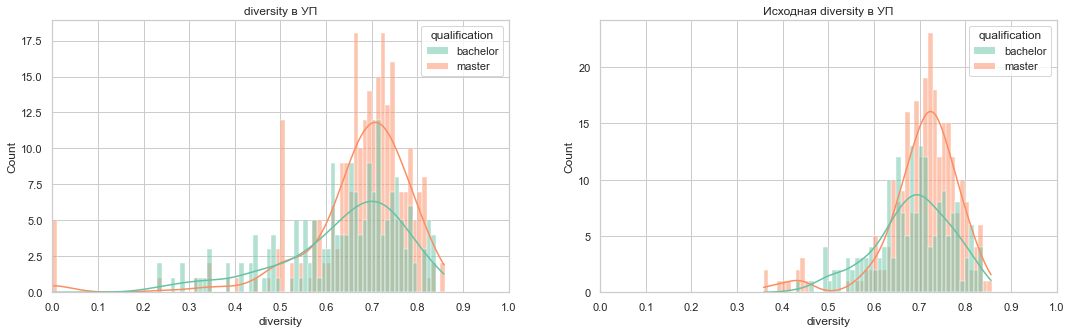

In [345]:
df_diversity_test2,_ = calculate_only_diversity(df_uncommon_clusters_extra)

df_diversity_test2 = pd.merge(df_diversity_test2, up_uncommon[["up_id", "year", "qualification"]], left_on="up_id", right_on="up_id").drop_duplicates(subset=["up_id"])
df_diversity_test2["qualification"] = df_diversity_test2.qualification.apply(lambda x: "master" if x == "master" else "bachelor")

# визуализация
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
sns.histplot(ax=axis[0], data=df_diversity_test2, x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[1].set_title(f"Исходная diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
sns.histplot(ax=axis[1], data=df_diversity, x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

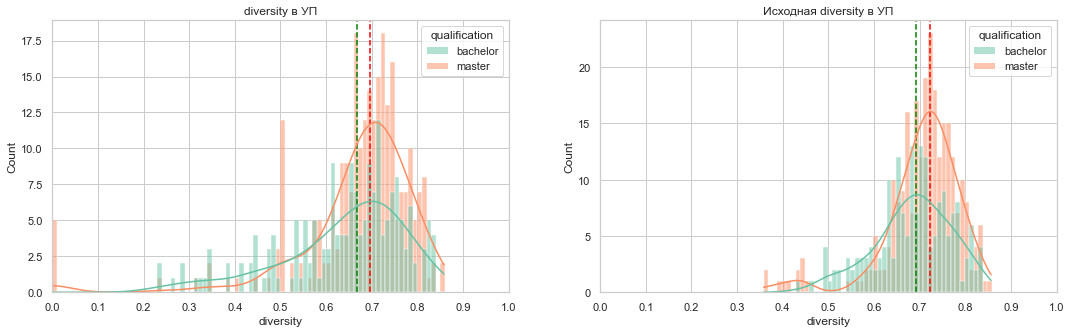

In [363]:
# визуализация
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity_test2.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[0].axvline(df_diversity_test2.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
sns.histplot(ax=axis[0], data=df_diversity_test2, x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[1].set_title(f"Исходная diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].axvline(df_diversity.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[1].axvline(df_diversity.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
sns.histplot(ax=axis[1], data=df_diversity, x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

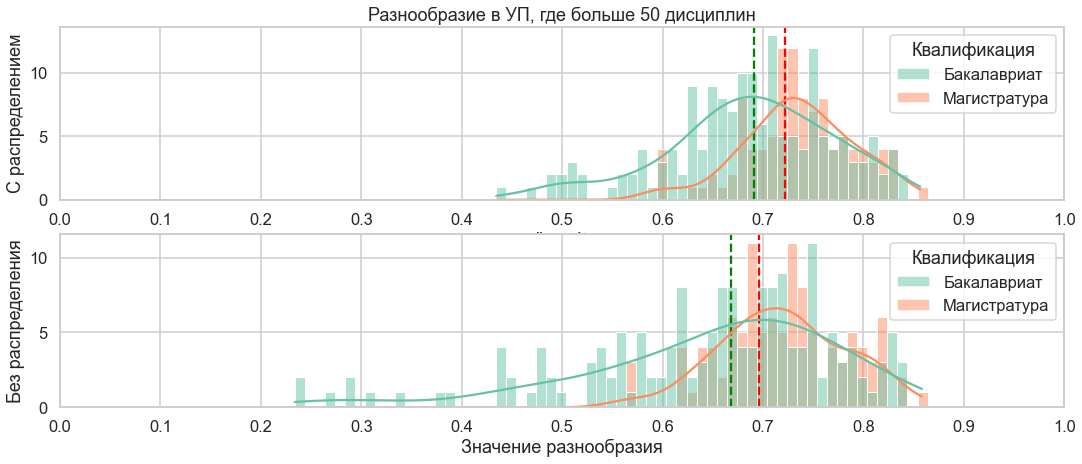

In [463]:
df_diversity_test2["Квалификация"] = df_diversity_test2["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")
df_diversity["Квалификация"] = df_diversity["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")


# визуализация только для планов, где больше 50 дисциплин
fig, axis = plt.subplots(2, 1, figsize=(18, 7))

axis[0].set_title(f"Разнообразие в УП, где больше 50 дисциплин")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].set_yticks(np.arange(0,11,5))
axis[1].axvline(df_diversity_test2.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[1].axvline(df_diversity_test2.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[1].set_ylabel("Без распределения")
axis[1].set_xlabel("")
sns.histplot(ax=axis[1], data=df_diversity_test2.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")

# axis[1].set_title(f"")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[0].set_ylabel("С распределением")
axis[1].set_xlabel("Значение разнообразия")
sns.histplot(ax=axis[0], data=df_diversity.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")
plt.show()

Если убрать самый несвязный кластер, то для магистратуры и бакалавриата разнообразие слегка понижается в примерно равных пропорциях.

In [349]:
df_uncommon_clusters_extra2 = df_uncommon_clusters.copy()

for up_id, dens in df_inside_sim.items():
    col = densest_cluster(dens)
    df_uncommon_clusters_extra2.loc[df_uncommon_clusters_extra2.up_id == up_id, col] = np.nan


df_diversity_test3,_ = calculate_only_diversity(df_uncommon_clusters_extra2)

df_diversity_test3 = pd.merge(df_diversity_test3, up_uncommon[["up_id", "year", "qualification"]], left_on="up_id", right_on="up_id").drop_duplicates(subset=["up_id"])
df_diversity_test3["qualification"] = df_diversity_test3.qualification.apply(lambda x: "master" if x == "master" else "bachelor")

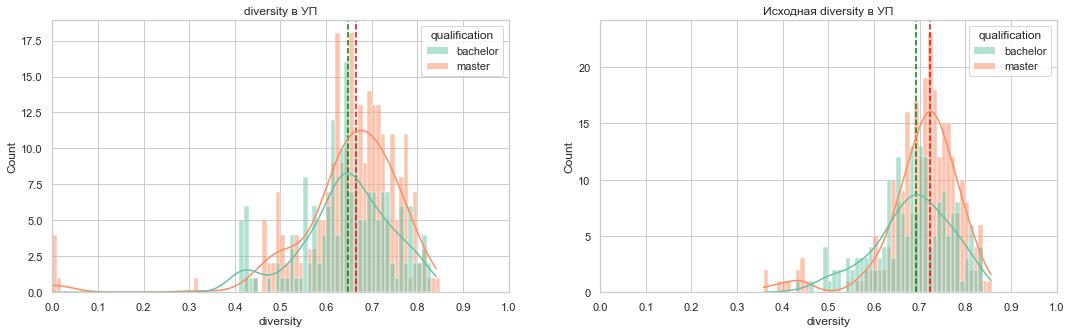

In [362]:
# визуализация
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"diversity в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity_test3.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[0].axvline(df_diversity_test3.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
sns.histplot(ax=axis[0], data=df_diversity_test3, x="diversity", kde=True, binwidth=0.01, hue="qualification")

axis[1].set_title(f"Исходная diversity в УП")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].axvline(df_diversity.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[1].axvline(df_diversity.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
sns.histplot(ax=axis[1], data=df_diversity, x="diversity", kde=True, binwidth=0.01, hue="qualification")
plt.show()

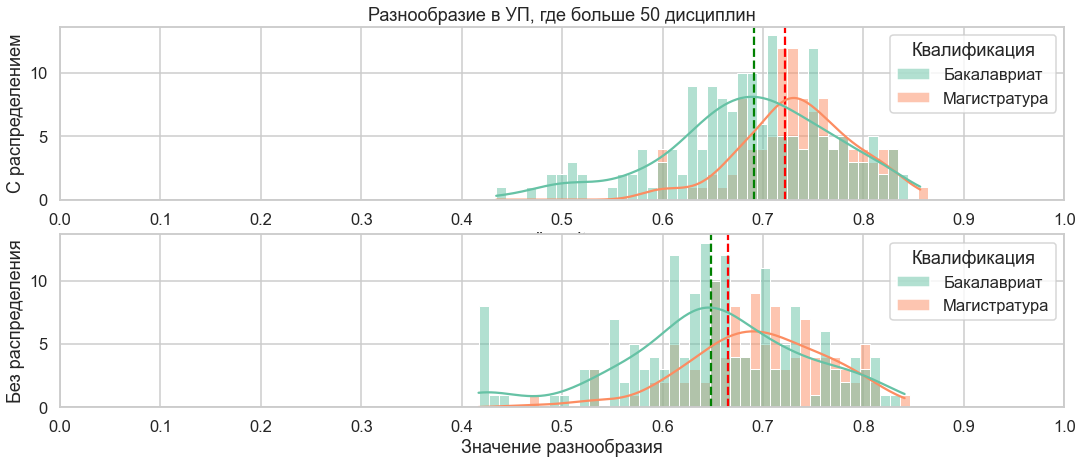

In [464]:
df_diversity_test3["Квалификация"] = df_diversity_test3["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")
df_diversity["Квалификация"] = df_diversity["qualification"].apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")


# визуализация только для планов, где больше 50 дисциплин
fig, axis = plt.subplots(2, 1, figsize=(18, 7))

axis[0].set_title(f"Разнообразие в УП, где больше 50 дисциплин")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
axis[1].set_yticks(np.arange(0,11,5))
axis[1].axvline(df_diversity_test3.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[1].axvline(df_diversity_test3.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[1].set_ylabel("Без распределения")
axis[1].set_xlabel("")
sns.histplot(ax=axis[1], data=df_diversity_test3.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")

# axis[1].set_title(f"")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].axvline(df_diversity.query("qualification=='master'").diversity.median(), color='red', linestyle='--')
axis[0].axvline(df_diversity.query("qualification=='bachelor'").diversity.median(), color='green', linestyle='--')
axis[0].set_ylabel("С распределением")
axis[1].set_xlabel("Значение разнообразия")
sns.histplot(ax=axis[0], data=df_diversity.query("n_courses >= 50"), x="diversity", kde=True, binwidth=0.01, hue="Квалификация")
plt.show()

Если убрать самый связный кластер, то распределение в целом не меняется, но разнообразие в среднем понижается. Для магистратуры сильнее, чем для бакалавриата.

# Эксперименты с entropy

In [87]:
def entropy_custom(vect, clst):
    return 1 - entropy(vect, base=len(clst))

# нормализация вектора
def norm_vector(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

def vect_is_empty(vect):
    return all(np.isnan(vect))

def calculate_entropy(up, up_id, embed):
    up["is_empty"] = up[embed].apply(vect_is_empty)
    up = up.loc[~up.is_empty == True]

    up_embeds = up.groupby(up_id)[embed].apply(np.sum).reset_index()
    # считаем кол-во дисциплин в плане
    plans_n = up.groupby(up_id)["course_id"].count().reset_index()

    up_embeds = pd.concat([up_embeds, plans_n["course_id"]], axis=1)
    up_embeds.rename(columns={"course_id": "num_of_disciplines"}, inplace=True)

    # считаем энтропию вектора плана
    up_embeds["entropy"] = up_embeds[embed].apply(lambda x: entropy_custom(x, dict_clusters))
    up_embeds.dropna(inplace=True)
    return up_embeds

### Реальные данные

In [170]:
sns.set_palette("Set2")

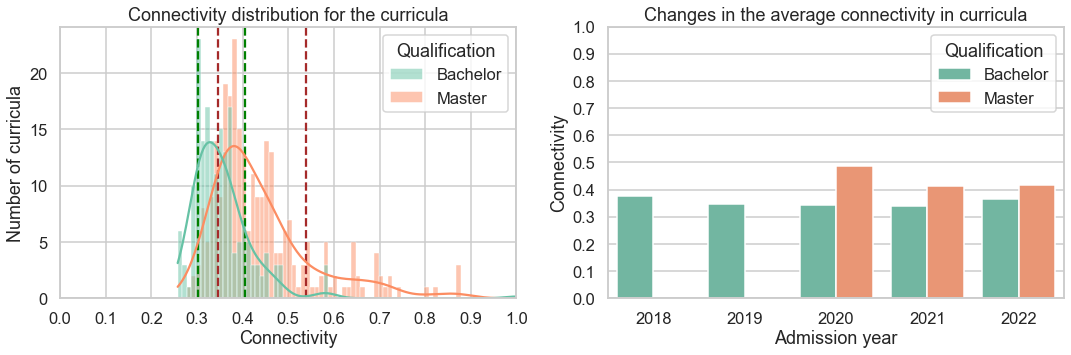

In [177]:
dfs_bac = [up_bac_2018, up_bac_2019, up_bac_2020, up_bac_2021, up_bac_2022]
dfs_mas = [up_mas_2020, up_mas_2021, up_mas_2022]

entropy_bac_2018 = calculate_entropy(up_bac_2018, "up_id", "embed")
entropy_bac_2019 = calculate_entropy(up_bac_2019, "up_id", "embed")
entropy_bac_2020 = calculate_entropy(up_bac_2020, "up_id", "embed")
entropy_bac_2021 = calculate_entropy(up_bac_2021, "up_id", "embed")
entropy_bac_2022 = calculate_entropy(up_bac_2022, "up_id", "embed")

entropy_mas_2020 = calculate_entropy(up_mas_2020, "up_id", "embed")
entropy_mas_2021 = calculate_entropy(up_mas_2021, "up_id", "embed")
entropy_mas_2022 = calculate_entropy(up_mas_2022, "up_id", "embed")

entropy_bac_2018["Год"] = 2018
entropy_bac_2019["Год"] = 2019
entropy_bac_2020["Год"] = 2020
entropy_bac_2021["Год"] = 2021
entropy_bac_2022["Год"] = 2022

entropy_mas_2020["Год"] = 2020
entropy_mas_2021["Год"] = 2021
entropy_mas_2022["Год"] = 2022


entropy_bac = pd.concat([entropy_bac_2018, entropy_bac_2019, entropy_bac_2020, entropy_bac_2021, entropy_bac_2022])
entropy_mas = pd.concat([entropy_mas_2020, entropy_mas_2021, entropy_mas_2022])

entropy_bac["Квалификация"] = "Бакалавриат"
entropy_mas["Квалификация"] = "Магистратура"

entropy_bac["Qualification"] = "Bachelor"
entropy_mas["Qualification"] = "Master"

entropy_total = pd.concat([entropy_bac, entropy_mas])
entropy_total_mean = entropy_total.groupby(["Год", "Qualification"])["entropy"].mean().reset_index()

sns.set_context("talk")
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

# axis[0].set_title(f"Распределение связности в УП")
axis[0].set_title(f"Connectivity distribution for the curricula")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
# axis[0].set_xlabel("Значение связности")
# axis[0].set_ylabel("Кол-во учебных планов")
axis[0].set_xlabel("Connectivity")
axis[0].set_ylabel("Number of curricula")
axis[0].axvline(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.15), color='brown', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.85), color='brown', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.15), color='green', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.85), color='green', linestyle='--')
sns.histplot(ax=axis[0], data=entropy_total.sort_values(by="Квалификация"), x="entropy", kde=True, binwidth=0.01, hue="Qualification")

axis[1].set_title(f"Changes in the average connectivity in curricula")
axis[1].set_yticks(np.arange(0,1.1,0.1))
axis[1].set_ylim(0,1)

sns.barplot(ax=axis[1], data=entropy_total_mean.sort_values(by="Qualification"), x="Год", y="entropy", hue="Qualification")
axis[1].set_xlabel("Admission year")
axis[1].set_ylabel("Connectivity");

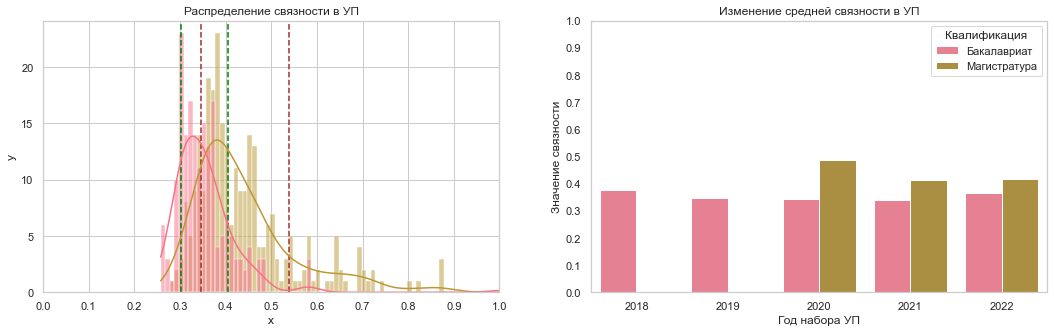

In [169]:
sns.set_context("notebook")
fig, axis = plt.subplots(1, 2, figsize=(18, 5))

axis[0].set_title(f"Распределение связности в УП")
axis[0].set_xticks(np.arange(0,1.1,0.1))
axis[0].set_xlim(0,1)
axis[0].set_xlabel("x")
axis[0].set_ylabel("y")
axis[0].axvline(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.15), color='brown', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.85), color='brown', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.15), color='green', linestyle='--')
axis[0].axvline(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.85), color='green', linestyle='--')
sns.histplot(ax=axis[0], data=entropy_total.sort_values(by="Квалификация"), x="entropy", kde=True, binwidth=0.01, hue="Квалификация",
             legend=False)

axis[1].set_title(f"Изменение средней связности в УП")
axis[1].set_yticks(np.arange(0,1.1,0.1))
axis[1].set_ylim(0,1)

sns.barplot(ax=axis[1], data=entropy_total_mean.sort_values(by="Квалификация"), x="Год", y="entropy", hue="Квалификация")
axis[1].set_xlabel("Год набора УП")
axis[1].set_ylabel("Значение связности")
plt.grid(False)
plt.show()

In [492]:
entropy_tot = pd.merge(entropy_total, up[["up_id", "ze", "direction_code"]], left_on="up_id", right_on="up_id", how="left")

In [15]:
entropy_total

up_id                                              embed  \
0    6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
1    6860  [2.225, 1.867857142857143, 0.9607142857142857,...   
2    6862  [1.1, 1.1666666666666667, 0.39285714285714285,...   
3    6863  [1.1, 1.1666666666666667, 0.25, 0.142857142857...   
4    6864  [1.1, 1.1666666666666667, 0.25, 0.142857142857...   
..    ...                                                ...   
83   7293  [3.775, 0.0, 0.0, 0.0, 0.0, 2.7222222222222223...   
84   7294  [3.775, 0.0, 0.0, 0.0, 0.0, 2.7222222222222223...   
85   7295  [3.775, 0.0, 0.0, 0.0, 0.0, 2.7222222222222223...   
86   7296  [10.308669108669108, 0.16666666666666666, 0.0,...   
87   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   

    num_of_disciplines   entropy   Год  Квалификация  
0                   47  0.317040  2018   Бакалавриат  
1                   47  0.366740  2018   Бакалавриат  
2                   22  0.402676  2018   Бакалавриат  
3                   23  0.426929  2018   Бакалавриат  
4                   23  0.435439  2018   Бакалавриат  
..                 ...       ...   ...           ...  
83                  71  0.336239  2022  Магистратура  
84                  71  0.336239  2022  Магистратура  
85                  71  0.336239  2022  Магистратура  
86                  57  0.373365  2022  Магистратура  
87                  50  0.388078  2022  Магистратура  

[458 rows x 6 columns]

In [499]:
up.query("up_id == 6859")["direction_code"].nunique()

35

In [500]:
up["direction_code"].nunique()

78

In [495]:
entropy_tot

up_id                                              embed  \
0         6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
1         6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
2         6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
3         6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
4         6859  [2.8055555555555554, 1.3111111111111111, 1.25,...   
...        ...                                                ...   
1941310   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   
1941311   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   
1941312   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   
1941313   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   
1941314   7297  [9.308669108669108, 0.16666666666666666, 0.0, ...   

         num_of_disciplines   entropy   Год  Квалификация   ze direction_code  
0                        47  0.317040  2018   Бакалавриат  [3]       15.03.04  
1                        47  0.317040  2018   Бакалавриат  [3]       19.03.02  
2                        47  0.317040  2018   Бакалавриат  [3]       19.03.03  
3                        47  0.317040  2018   Бакалавриат  [3]       23.03.03  
4                        47  0.317040  2018   Бакалавриат  [3]       10.03.01  
...                     ...       ...   ...           ...  ...            ...  
1941310                  50  0.388078  2022  Магистратура  [2]       11.04.02  
1941311                  50  0.388078  2022  Магистратура  [2]       27.04.05  
1941312                  50  0.388078  2022  Магистратура  [2]       09.04.01  
1941313                  50  0.388078  2022  Магистратура  [2]       11.04.02  
1941314                  50  0.388078  2022  Магистратура  [2]       27.04.05  

[1941315 rows x 8 columns]

In [16]:
entropy_total.to_csv("connectivity_all_plans.csv", index=False)

In [388]:
print(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.15))
print(entropy_total.query("Квалификация=='Магистратура'").entropy.quantile(0.85))
print(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.15))
print(entropy_total.query("Квалификация=='Бакалавриат'").entropy.quantile(0.85))

0.34668136799174826
0.5399805266857393
0.30174544345630977
0.4059766875421138


In [399]:
entropy_total.query("entropy > 0.85")

up_id                                              embed  \
34   7353  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
63   7054  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
49   7139  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
55   7150  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

    num_of_disciplines   entropy   Год  Квалификация  
34                   1  1.000000  2022   Бакалавриат  
63                  12  0.868487  2020  Магистратура  
49                  15  0.872765  2021  Магистратура  
55                  12  0.868487  2021  Магистратура

In [397]:
up.query("up_id == 6958")

up_id                      up_title  course_id  year qualification  \
1538      6958  Технологии защиты информации      10333  2021      bachelor   
30078     6958  Технологии защиты информации       7262  2021      bachelor   
40477     6958  Технологии защиты информации       7258  2021      bachelor   
56648     6958  Технологии защиты информации       7292  2021      bachelor   
66741     6958  Технологии защиты информации       2671  2021      bachelor   
...        ...                           ...        ...   ...           ...   
1935587   6958  Технологии защиты информации      14019  2021      bachelor   
1937844   6958  Технологии защиты информации       4110  2021      bachelor   
1937930   6958  Технологии защиты информации      10297  2021      bachelor   
1942047   6958  Технологии защиты информации      24081  2021      bachelor   
1942208   6958  Технологии защиты информации      14892  2021      bachelor   

         discipline_code_x  Unnamed: 0     id discipline_code_y  \
1538                  7130        1751  10333              7130   
30078                  716        1528   7262               716   
40477                  611        1527   7258               611   
56648                  626        1532   7292               626   
66741                  787          29   2671               787   
...                    ...         ...    ...               ...   
1935587               7889        3200  14019              7889   
1937844               2991         539   4110              2991   
1937930               7466        1740  10297              7466   
1942047              29839        7939  24081             29839   
1942208               7767        3459  14892              7767   

                                                     title qualification_y  \
1538     Инновационная экономика и технологическое пред...      All_levels   
30078                     Методы искусственного интеллекта      All_levels   
40477                                  Методы криптографии      All_levels   
56648                        Теория массового обслуживания      All_levels   
66741                                  Компьютерное зрение      All_levels   
...                                                    ...             ...   
1935587                                      Теория графов        bachelor   
1937844                        Технические средства охраны        bachelor   
1937930                                   Численные методы        bachelor   
1942047   Программно-аппаратные средства защиты информации        bachelor   
1942208           Введение в профессиональную деятельность        bachelor   

                                               description work_status  \
1538     Данная дисциплина нацелена на развитие теорети...           w   
30078    В курсе освещаются основные достижения искусст...           w   
40477    Данный курс познакомит слушателей с основами к...           w   
56648    Дисциплина рассматривает теоретические и практ...           w   
66741    В курсе рассматриваются основные задачи из обл...           w   
...                                                    ...         ...   
1935587  В данном курсе рассматриваются основные поняти...           w   
1937844  В данном курсе студенты изучат современные кон...           w   
1937930  Курс направлена на получение базовых знаний в ...           w   
1942047  В рамках данной дисциплины студенты изучают ис...           w   
1942208  В данном курсе обучающиеся узнают архитектуру ...           w   

                                             section_topic  \
1538     Unit-экономика. Метрики. Количество привлеченн...   
30078    Методы искусственного интеллекта. Введение в и...   
40477    Методы криптографии. Исторические шифры и осно...   
56648    Математические основы ТМО. Пуассоновский проце...   
66741    Компьютерное зрение. Предобрабока изображений....   
...                                                    ..

## Случайные сущности

### Бакалавриат

#### 2018

up_id                                              embed  \
38   7313  [1.1, 1.1666666666666667, 0.39285714285714285,...   
18   6880                                                NaN   

    num_of_disciplines   entropy     Год                    rf  \
38                  21  0.388514  2018.0       Реальные данные   
18                  23  0.204190     NaN  Искусственные данные   

                                         random_embed  
38                                                NaN  
18  [3.3333333333333335, 2.3333333333333335, 1.0, ...

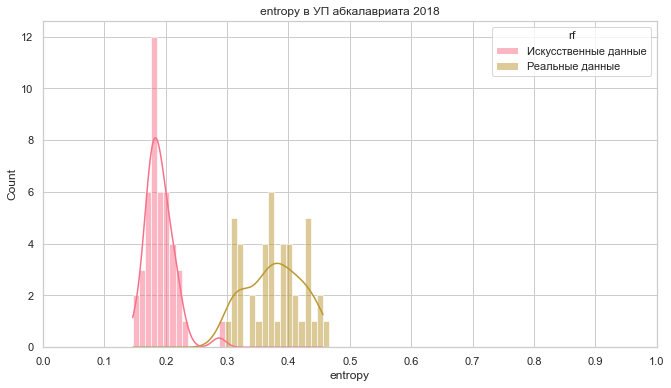

In [217]:
fake_entities_entropy_2018 = calculate_entropy(up_bac_2018, "up_id", "random_embed")

entropy_bac_2018["rf"] = "Реальные данные"
fake_entities_entropy_2018["rf"] = "Искусственные данные"
fee2018 = pd.concat([entropy_bac_2018, fake_entities_entropy_2018])
display(fee2018.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2018")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2018.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2019

up_id                                              embed  \
11   6924  [3.5873015873015874, 4.194444444444445, 2.1, 3...   
27   6946  [3.1507936507936507, 3.0, 0.0, 0.4381313131313...   

    num_of_disciplines   entropy     Год               rf random_embed  
11                  65  0.335370  2019.0  Реальные данные          NaN  
27                  61  0.276248  2019.0  Реальные данные          NaN

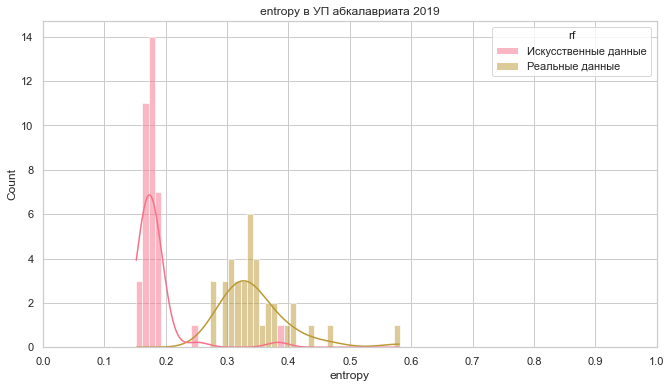

In [218]:
fake_entities_entropy_2019 = calculate_entropy(up_bac_2019, "up_id", "random_embed")

entropy_bac_2019["rf"] = "Реальные данные"
fake_entities_entropy_2019["rf"] = "Искусственные данные"
fee2019 = pd.concat([entropy_bac_2019, fake_entities_entropy_2019])
display(fee2019.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2019")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2019.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2020

up_id                                              embed  \
19   7035  [2.15515873015873, 1.1111111111111112, 0.25, 2...   
25   7081  [8.68015873015873, 1.4444444444444444, 0.1, 2....   

    num_of_disciplines   entropy     Год               rf random_embed  
19                  41  0.342392  2020.0  Реальные данные          NaN  
25                  43  0.393173  2020.0  Реальные данные          NaN

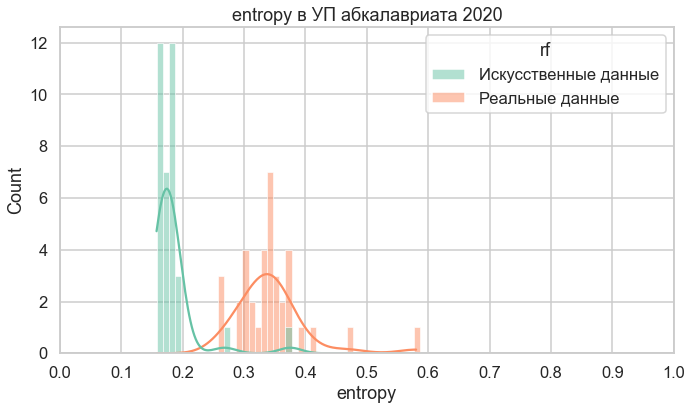

In [468]:
fake_entities_entropy_2020 = calculate_entropy(up_bac_2020, "up_id", "random_embed")

entropy_bac_2020["rf"] = "Реальные данные"
fake_entities_entropy_2020["rf"] = "Искусственные данные"
fee2020 = pd.concat([entropy_bac_2020, fake_entities_entropy_2020])
display(fee2020.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2020")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2020.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2021

up_id                                              embed  \
10   6968  [4.841269841269842, 7.666666666666666, 0.0, 2....   
34   7342                                                NaN   

    num_of_disciplines   entropy     Год                    rf  \
10                  79  0.257881  2021.0       Реальные данные   
34                  38  0.183533     NaN  Искусственные данные   

                                         random_embed  
10                                                NaN  
34  [7.333333333333333, 3.0, 0.5, 5.0, 3.0, 9.5, 1...

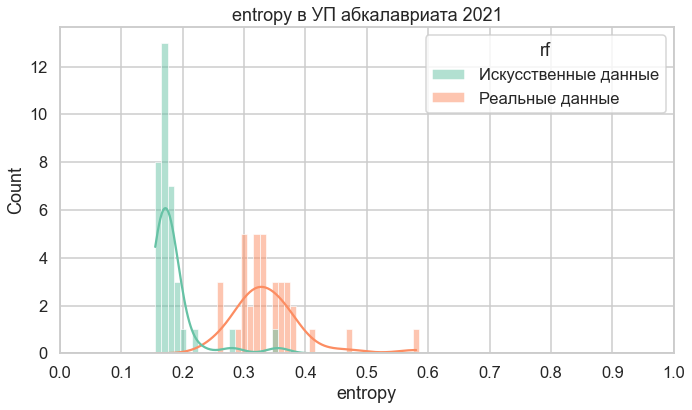

In [467]:
fake_entities_entropy_2021 = calculate_entropy(up_bac_2021, "up_id", "random_embed")

entropy_bac_2021["rf"] = "Реальные данные"
fake_entities_entropy_2021["rf"] = "Искусственные данные"
fee2021 = pd.concat([entropy_bac_2021, fake_entities_entropy_2021])
display(fee2021.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2021")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2021.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2022

up_id                                              embed  \
20   7246  [9.22063492063492, 4.333333333333333, 0.0, 3.9...   
12   7238  [3.746031746031746, 4.142857142857142, 0.0, 4....   

    num_of_disciplines   entropy     Год               rf random_embed  
20                  48  0.356169  2022.0  Реальные данные          NaN  
12                  31  0.385719  2022.0  Реальные данные          NaN

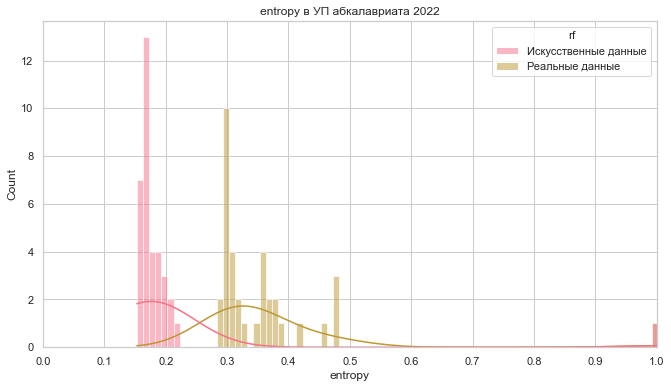

In [221]:
fake_entities_entropy_2022 = calculate_entropy(up_bac_2022, "up_id", "random_embed")

entropy_bac_2022["rf"] = "Реальные данные"
fake_entities_entropy_2022["rf"] = "Искусственные данные"
fee2022 = pd.concat([entropy_bac_2022, fake_entities_entropy_2022])
display(fee2022.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2022")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2022.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

### Магистратура

#### 2020

up_id                                              embed  \
68   7060  [2.0, 0.0, 0.5, 0.05263157894736842, 1.1666666...   
64   7055                                                NaN   

    num_of_disciplines   entropy     Год                    rf  \
68                  22  0.434847  2020.0       Реальные данные   
64                  19  0.216103     NaN  Искусственные данные   

                                         random_embed  
68                                                NaN  
64  [4.333333333333334, 3.0, 1.8333333333333333, 3...

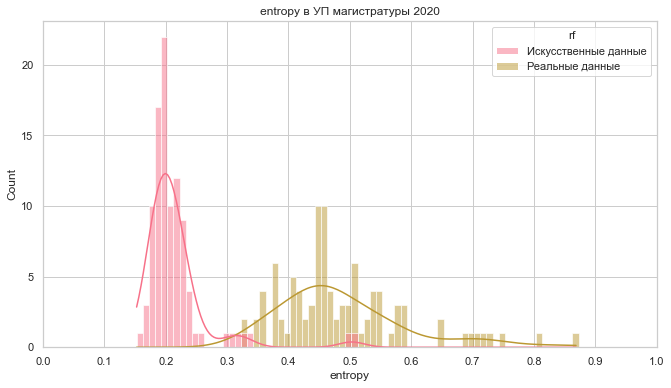

In [222]:
fake_entities_entropy_2020_mas = calculate_entropy(up_mas_2020, "up_id", "random_embed")

entropy_mas_2020["rf"] = "Реальные данные"
fake_entities_entropy_2020_mas["rf"] = "Искусственные данные"
fee2020_mas = pd.concat([entropy_mas_2020, fake_entities_entropy_2020_mas])
display(fee2020_mas.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП магистратуры 2020")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2020_mas.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2021

up_id                                              embed  \
26   7105                                                NaN   
40   7119  [2.1666666666666665, 0.0, 0.0, 1.6359649122807...   

    num_of_disciplines   entropy     Год                    rf  \
26                  51  0.171025     NaN  Искусственные данные   
40                  47  0.323443  2021.0       Реальные данные   

                                         random_embed  
26  [7.166666666666666, 1.8333333333333333, 1.0, 1...  
40                                                NaN

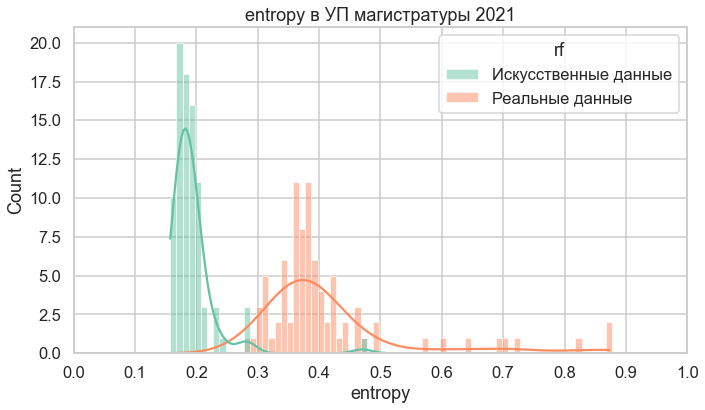

In [472]:
fake_entities_entropy_2021_mas = calculate_entropy(up_mas_2021, "up_id", "random_embed")

entropy_mas_2021["rf"] = "Реальные данные"
fake_entities_entropy_2021_mas["rf"] = "Искусственные данные"
fee2021_mas = pd.concat([entropy_mas_2021, fake_entities_entropy_2021_mas])
display(fee2021_mas.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП магистратуры 2021")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2021_mas.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2022

up_id embed  num_of_disciplines   entropy  Год                    rf  \
0    7173   NaN                  42  0.173918  NaN  Искусственные данные   
33   7207   NaN                  72  0.162806  NaN  Искусственные данные   

                                         random_embed  
0   [8.333333333333332, 7.666666666666667, 2.0, 8....  
33  [19.666666666666668, 8.5, 1.8333333333333333, ...

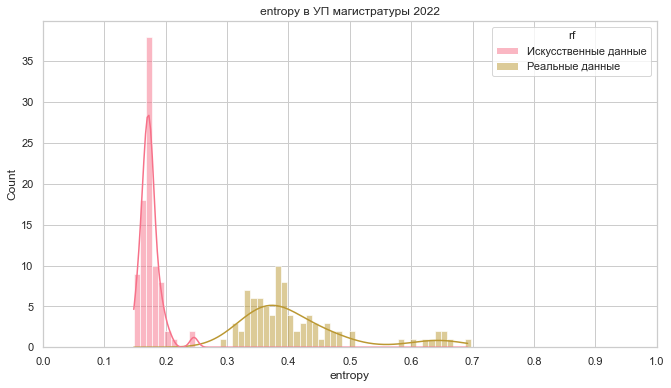

In [224]:
fake_entities_entropy_2022_mas = calculate_entropy(up_mas_2022, "up_id", "random_embed")

entropy_mas_2022["rf"] = "Реальные данные"
fake_entities_entropy_2022_mas["rf"] = "Искусственные данные"
fee2022_mas = pd.concat([entropy_mas_2022, fake_entities_entropy_2022_mas])
display(fee2022_mas.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП магистратуры 2022")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fee2022_mas.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

## Перетасовка планов

### Бакалавриат

#### 2018

up_id                                              embed  \
41  7343.0  [1.2, 1.0, 1.0, 0.22619047619047616, 0.1428571...   
34     NaN  [1.1428571428571428, 2.0, 2.392857142857143, 0...   

    num_of_disciplines   entropy     Год                    rf  up_id_rand  
41                  22  0.375955  2018.0       Реальные данные         NaN  
34                  32  0.283112     NaN  Искусственные данные      6905.0

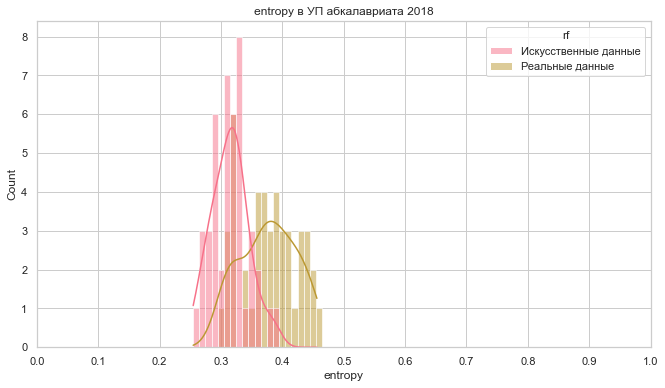

In [225]:
fake_plans_entropy_2018 = calculate_entropy(up_bac_2018, "up_id_rand", "embed")

fake_plans_entropy_2018["rf"] = "Искусственные данные"
fpe2018 = pd.concat([entropy_bac_2018, fake_plans_entropy_2018])
display(fpe2018.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП абкалавриата 2018")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fpe2018.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2019

up_id                                              embed  \
10  6923.0  [3.5873015873015874, 4.194444444444445, 2.1, 3...   
26  6945.0  [3.0190476190476194, 3.111111111111111, 0.1, 0...   

    num_of_disciplines   entropy     Год               rf  up_id_rand  
10                  65  0.335985  2019.0  Реальные данные         NaN  
26                  48  0.322213  2019.0  Реальные данные         NaN

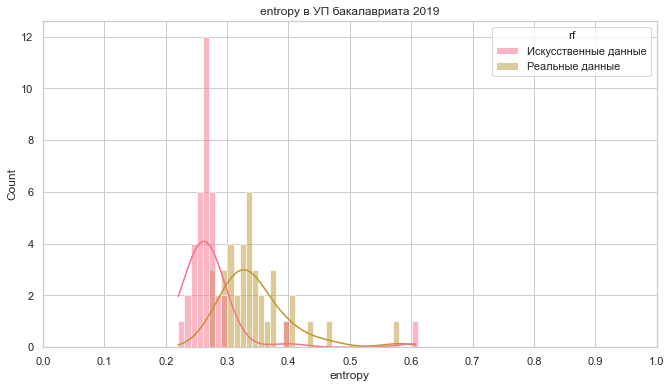

In [226]:
fake_plans_entropy_2019 = calculate_entropy(up_bac_2019, "up_id_rand", "embed")

fake_plans_entropy_2019["rf"] = "Искусственные данные"
fpe2019 = pd.concat([entropy_bac_2019, fake_plans_entropy_2019])
display(fpe2019.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП бакалавриата 2019")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fpe2019.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2020

up_id                                              embed  \
22  7072.0  [3.3333333333333335, 2.125, 0.0, 1.93333333333...   
24  7079.0  [3.3333333333333335, 2.125, 0.0, 1.93333333333...   

    num_of_disciplines   entropy     Год               rf  up_id_rand  
22                  60  0.299194  2020.0  Реальные данные         NaN  
24                  60  0.299194  2020.0  Реальные данные         NaN

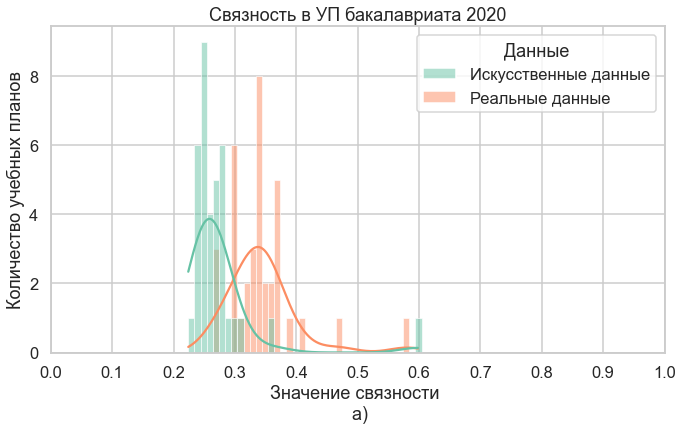

In [470]:
fake_plans_entropy_2020 = calculate_entropy(up_bac_2020, "up_id_rand", "embed")

fake_plans_entropy_2020["rf"] = "Искусственные данные"
fpe2020 = pd.concat([entropy_bac_2020, fake_plans_entropy_2020])
display(fpe2020.sample(2))

fpe2020.rename(columns={"rf": "Данные"}, inplace=True)
# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"Связность в УП бакалавриата 2020")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.xlabel("Значение связности \n а)")
plt.ylabel("Количество учебных планов")
sns.histplot(data=fpe2020.sort_values(by="Данные"), x="entropy", kde=True, binwidth=0.01, hue="Данные");

#### 2021

up_id                                              embed  \
23     NaN  [3.275, 3.8444444444444446, 0.2222222222222222...   
16  7123.0  [3.3333333333333335, 1.125, 0.0, 1.93333333333...   

    num_of_disciplines   entropy     Год                    rf  up_id_rand  
23                  52  0.279908     NaN  Искусственные данные      7146.0  
16                  60  0.296865  2021.0       Реальные данные         NaN

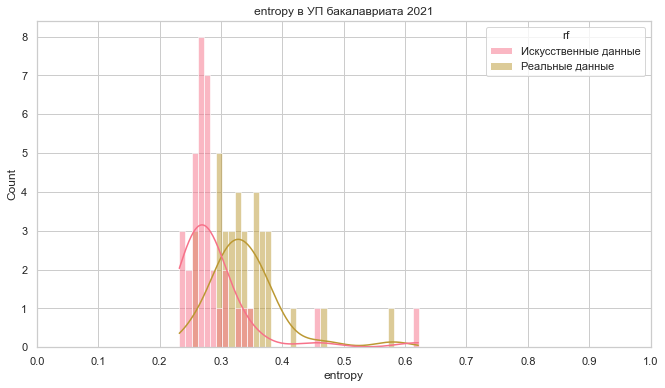

In [228]:
fake_plans_entropy_2021 = calculate_entropy(up_bac_2021, "up_id_rand", "embed")

fake_plans_entropy_2021["rf"] = "Искусственные данные"
fpe2021 = pd.concat([entropy_bac_2021, fake_plans_entropy_2021])
display(fpe2021.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП бакалавриата 2021")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fpe2021.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2022

up_id                                              embed  \
14    NaN  [3.1468253968253967, 5.111111111111111, 0.5151...   
3     NaN  [2.8, 3.4, 0.38888888888888884, 4.083333333333...   

    num_of_disciplines   entropy  Год                    rf  up_id_rand  
14                  41  0.296629  NaN  Искусственные данные      7240.0  
3                   22  0.328539  NaN  Искусственные данные      7229.0

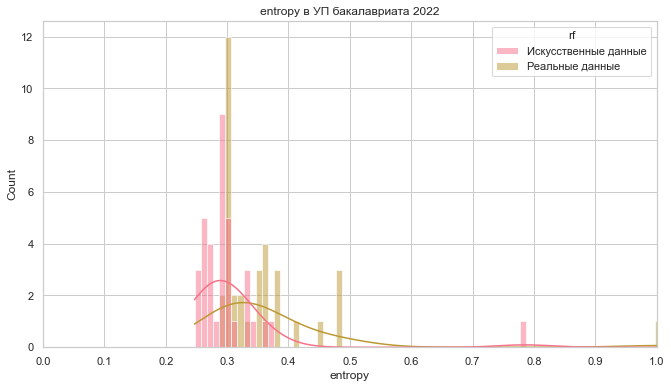

In [231]:
fake_plans_entropy_2022 = calculate_entropy(up_bac_2022, "up_id_rand", "embed")

fake_plans_entropy_2022["rf"] = "Искусственные данные"
fpe2022 = pd.concat([entropy_bac_2022, fake_plans_entropy_2022])
display(fpe2022.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП бакалавриата 2022")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fpe2022.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

### Магистратура

#### 2020

up_id                                              embed  \
20  7002.0  [4.0, 0.0, 0.0, 1.344298245614035, 0.583333333...   
56     NaN  [1.0, 0.0, 0.16666666666666666, 0.552631578947...   

    num_of_disciplines   entropy     Год                    rf  up_id_rand  
20                  21  0.448091  2020.0       Реальные данные         NaN  
56                  20  0.347000     NaN  Искусственные данные      7045.0

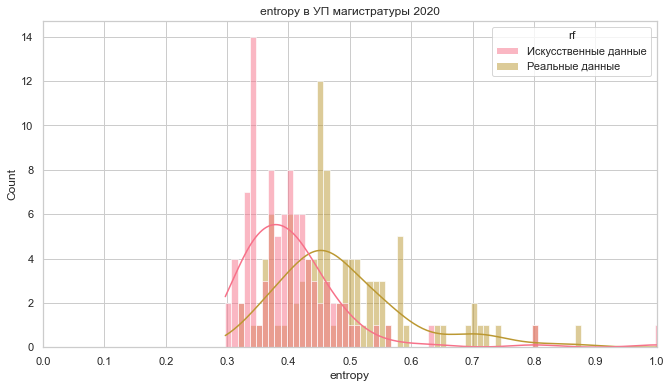

In [232]:
fake_plans_entropy_2020_mas = calculate_entropy(up_mas_2020, "up_id_rand", "embed")

fake_plans_entropy_2020_mas["rf"] = "Искусственные данные"
fpe2020_mas = pd.concat([entropy_mas_2020, fake_plans_entropy_2020_mas])
display(fpe2020_mas.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП магистратуры 2020")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.xlabel("Значение связности \n б)")
plt.ylabel("Количество учебных планов")
sns.histplot(data=fpe2020_mas.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

#### 2021

up_id                                              embed  \
64  7163.0  [2.5, 2.0, 0.0, 2.0288220551378444, 3.46190476...   
76     NaN  [1.25, 0.1, 0.0, 1.1637426900584795, 0.5, 4.16...   

    num_of_disciplines   entropy     Год                    rf  up_id_rand  
64                  64  0.358869  2021.0       Реальные данные         NaN  
76                  37  0.306135     NaN  Искусственные данные      7324.0

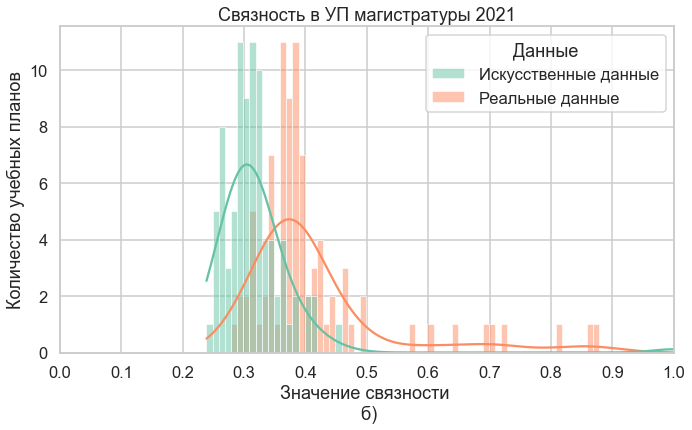

In [475]:
fake_plans_entropy_2021_mas = calculate_entropy(up_mas_2021, "up_id_rand", "embed")

fake_plans_entropy_2021_mas["rf"] = "Искусственные данные"
fpe2021_mas = pd.concat([entropy_mas_2021, fake_plans_entropy_2021_mas])
display(fpe2021_mas.sample(2))
fpe2021_mas.rename(columns={"rf": "Данные"}, inplace=True)
# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"Связность в УП магистратуры 2021")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.xlabel("Значение связности \n б)")
plt.ylabel("Количество учебных планов")
sns.histplot(data=fpe2021_mas.sort_values(by="Данные"), x="entropy", kde=True, binwidth=0.01, hue="Данные");

#### 2022

up_id                                              embed  \
49     NaN  [4.934523809523809, 0.16666666666666666, 0.0, ...   
62  7258.0  [1.788888888888889, 2.0, 0.0, 3.64285714285714...   

    num_of_disciplines   entropy     Год                    rf  up_id_rand  
49                  73  0.369006     NaN  Искусственные данные      7223.0  
62                  26  0.430311  2022.0       Реальные данные         NaN

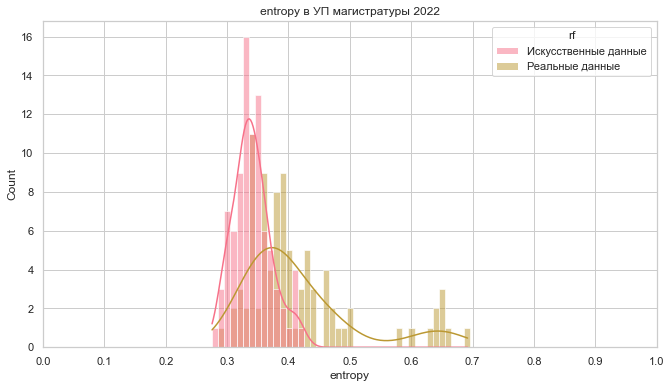

In [234]:
fake_plans_entropy_2022_mas = calculate_entropy(up_mas_2022, "up_id_rand", "embed")

fake_plans_entropy_2022_mas["rf"] = "Искусственные данные"
fpe2022_mas = pd.concat([entropy_mas_2022, fake_plans_entropy_2022_mas])
display(fpe2022_mas.sample(2))

# визуализация
plt.figure(figsize=(11, 6))
plt.title(f"entropy в УП магистратуры 2022")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=fpe2022_mas.sort_values(by="rf"), x="entropy", kde=True, binwidth=0.01, hue="rf");

In [410]:
uniq_up = up.drop_duplicates(subset=["up_id"])
single_year_up = uniq_up.up_title.value_counts().sort_values(ascending=True).reset_index().query("up_title == 1")
uniq_up.loc[uniq_up.up_title.isin(single_year_up["index"].values)].year.value_counts()

2020    32
2022    26
2018    14
2021    10
2023     2
2019     1
Name: year, dtype: int64

## Эксперимент с переводами внутри ИТМО

In [17]:
transit = pd.read_excel("transit.xls")

In [18]:
up

up_id                                           up_title  course_id  \
0         6940      Интеллектуальные системы в гуманитарной сфере      10258   
13        6941   Программирование в инфокоммуникационных системах      10258   
26        6918                     Мобильные и сетевые технологии      10258   
39        6933  Иностранные языки и информационные технологии ...      10258   
52        7035                     Мобильные и сетевые технологии      10258   
...        ...                                                ...        ...   
1942991   6909                                 Бизнес-информатика      24548   
1942992   6909                                 Бизнес-информатика      24547   
1942993   7462       Математические технологии системного анализа      23951   
1942994   7462       Математические технологии системного анализа      23952   
1942995   7462       Математические технологии системного анализа      23954   

         year qualification  discipline_code_x  Unnamed: 0     id  \
0        2019      bachelor               2675        1728  10258   
13       2019      bachelor               2675        1728  10258   
26       2019      bachelor               2675        1728  10258   
39       2019      bachelor               2675        1728  10258   
52       2020      bachelor               2675        1728  10258   
...       ...           ...                ...         ...    ...   
1942991  2020      bachelor              29972        8159  24548   
1942992  2020      bachelor              29971        8158  24547   
1942993  2023        master              31277        7892  23951   
1942994  2023        master              31279        7893  23952   
1942995  2023        master              31272        7895  23954   

        discipline_code_y                                   title  \
0                    2675  Основы обработки мультимедийных данных   
13                   2675  Основы обработки мультимедийных данных   
26                   2675  Основы обработки мультимедийных данных   
39                   2675  Основы обработки мультимедийных данных   
52                   2675  Основы обработки мультимедийных данных   
...                   ...                                     ...   
1942991             29972                             Базы данных   
1942992             29971        Инновационные технологии бизнеса   
1942993             31277                   Технологии теории игр   
1942994             31279            Статистический анализ систем   
1942995             31272             Создание и обучение моделей   

        qualification_y                                        description  \
0              bachelor  Дисциплина по выбору для студентов факультета ...   
13             bachelor  Дисциплина по выбору для студентов факультета ...   
26             bachelor  Дисциплина по выбору для студентов факультета ...   
39             bachelor  Дисциплина по выбору для студентов факультета ...   
52             bachelor  Дисциплина по выбору для студентов факультета ...   
...                 ...                                                ...   
1942991        bachelor  Базы данных являются неотъемлемой частью больш...   
1942992        bachelor  Курс "Инновационные технологии бизнеса" направ...   
1942993          master  Курс направлен на знакомство с основами теории...   
1942994          master  При изучении сложных объектов и систем часто в...   
1942995          master  Цели и задачи курса: Курс направлен на знакомс...   

        work_status                                      section_topic  \
0                 w  Анализ мультимедийных данных. Задачи анализа и...   
13                w  Анализ мультимедийных данных. Задачи анализа и...   
26                w  Анализ мультимедийных данных. Задачи анализа и...   
39                w  Анализ мультимедийных данных. Задачи анализа и...   
52                w  Анализ мультимедийных данных. Задачи анализа и...   
...      

In [40]:
uniq_year = up.loc[up.up_title.isin(up.groupby(["up_title"])["year"].nunique().sort_values().reset_index().query("year==1").up_title.values)]

In [43]:
uniq_year["sems"] = uniq_year.ze.apply(len)
uniq_year["sems"].value_counts()

1    7090
2     243
3      50
4      34
0      30
Name: sems, dtype: int64

In [49]:
uniq_year["ze"]

156        [2]
299        [4]
312        [4]
638        [3]
1388       [3]
          ... 
1942989    [2]
1942990    [2]
1942993    [2]
1942994    [2]
1942995    [2]
Name: ze, Length: 7447, dtype: object

In [53]:
def get_course(sem):
    if len(sem)>0 and min(sem) in (1,2):
        return 1
    if len(sem)>0 and min(sem) in (3,4):
        return 2
    if len(sem)>0 and min(sem) in (5,6):
        return 3
    if len(sem)>0 and min(sem) in (7,8):
        return 4
    else:
        return 0

uniq_year["Курс"] = uniq_year.ze.apply(get_course)

In [55]:
def get_year(row):
    if row["Курс"] == 1 and row["year"] == 2018:
        return "2018/2019"
    if (row["Курс"] == 1 and row["year"] == 2019) or (row["Курс"] == 2 and row["year"] == 2018):
        return "2019/2020"
    if (row["Курс"] == 1 and row["year"] == 2020) or (row["Курс"] == 2 and row["year"] == 2019) or (row["Курс"] == 3 and row["year"] == 2018):
        return "2020/2021"
    if (row["Курс"] == 1 and row["year"] == 2021) or (row["Курс"] == 2 and row["year"] == 2020) or (row["Курс"] == 3 and row["year"] == 2019) or (row["Курс"] == 4 and row["year"] == 2018):
        return "2021/2022"
    if (row["Курс"] == 1 and row["year"] == 2022) or (row["Курс"] == 2 and row["year"] == 2021) or (row["Курс"] == 3 and row["year"] == 2020) or (row["Курс"] == 4 and row["year"] == 2019):
        return "2022/2023"

In [63]:
uniq_year["Учебный год"] = uniq_year.apply(lambda row: get_year(row), axis=1)

In [86]:
d_gr_real_years = calculate_diversity(uniq_year, ["up_title", "Учебный год"], "comb_res", "embed")

In [88]:
con_real_years = calculate_entropy(uniq_year, ["up_title", "Учебный год"], "embed")

In [96]:
d_gr_real_years["diversity"] = d_gr_real_years["diversity"].round(5)

In [97]:
con_real_years.rename(columns={"entropy": "connectivity"}, inplace=True)

In [100]:
d_gr_real_years

up_id                                           up_title n_courses  \
0    2020/2021  Автоматизация технологических процессов и прои...        38   
1    2021/2022  Автоматизация технологических процессов и прои...         8   
2    2021/2022                                  Агробиотехнология        29   
3    2022/2023                                  Агробиотехнология        10   
4    2022/2023      Безопасность систем искусственного интеллекта        46   
..         ...                                                ...       ...   
215  2021/2022             Экономика высокотехнологичной компании         5   
216  2022/2023                Экотехнологии и устойчивое развитие        23   
217  2021/2022    Энергоэффективность и возобновляемая энергетика        17   
218  2022/2023    Энергоэффективность и возобновляемая энергетика        27   
219  2022/2023  Энергоэффективные инженерные системы и техноло...        62   

    n_clusters  modularity  diversity  inside_distance  
0            6       0.527    0.82681         0.836656  
1            2       0.000    0.00000              NaN  
2            8       0.749    0.82592         0.870609  
3            2       0.000    0.47564         0.559687  
4            7       0.598    0.78020         0.759404  
..         ...         ...        ...              ...  
215          2       0.000    0.39430         0.456642  
216          6       0.429    0.75461         0.658636  
217          4       0.640    0.71325         0.624143  
218          3       0.375    0.58215         0.294279  
219          7       0.629    0.76472         0.638858  

[220 rows x 7 columns]

In [98]:
con_real_years

up_title Учебный год  \
0    Автоматизация технологических процессов и прои...   2020/2021   
1    Автоматизация технологических процессов и прои...   2021/2022   
2                                    Агробиотехнология   2021/2022   
3                                    Агробиотехнология   2022/2023   
4        Безопасность систем искусственного интеллекта   2022/2023   
..                                                 ...         ...   
226             Экономика высокотехнологичной компании   2021/2022   
227                Экотехнологии и устойчивое развитие   2022/2023   
228    Энергоэффективность и возобновляемая энергетика   2021/2022   
229    Энергоэффективность и возобновляемая энергетика   2022/2023   
230  Энергоэффективные инженерные системы и техноло...   2022/2023   

                                                 embed  num_of_disciplines  \
0    [4.6, 0.0, 0.0, 0.10526315789473684, 0.0, 0.66...                  36   
1    [0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, ...                   8   
2    [2.3, 0.0, 0.0, 0.05263157894736842, 0.0, 2.50...                  28   
3    [0.125, 0.14285714285714285, 0.0, 0.0, 0.0, 1....                  10   
4    [7.908669108669109, 0.0, 0.0, 1.90476190476190...                  45   
..                                                 ...                 ...   
226  [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 1.6666666666666...                   5   
227  [0.2111111111111111, 1.1111111111111112, 0.0, ...                  22   
228  [0.25384615384615383, 0.0, 0.0, 0.0, 0.1, 2.1,...                  17   
229  [1.0, 1.1666666666666667, 0.25, 1.434523809523...                  27   
230  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   

     connectivity  
0        0.487734  
1        0.553388  
2        0.458806  
3        0.484838  
4        0.389279  
..            ...  
226      0.478443  
227      0.441414  
228      0.458448  
229      0.307890  
230      0.354376  

[231 rows x 5 columns]

In [101]:
tot = pd.merge(d_gr_real_years, con_real_years, left_on=["up_title", "up_id"], right_on=["up_title", "Учебный год"])
tot

up_id                                           up_title n_courses  \
0    2020/2021  Автоматизация технологических процессов и прои...        38   
1    2021/2022  Автоматизация технологических процессов и прои...         8   
2    2021/2022                                  Агробиотехнология        29   
3    2022/2023                                  Агробиотехнология        10   
4    2022/2023      Безопасность систем искусственного интеллекта        46   
..         ...                                                ...       ...   
215  2021/2022             Экономика высокотехнологичной компании         5   
216  2022/2023                Экотехнологии и устойчивое развитие        23   
217  2021/2022    Энергоэффективность и возобновляемая энергетика        17   
218  2022/2023    Энергоэффективность и возобновляемая энергетика        27   
219  2022/2023  Энергоэффективные инженерные системы и техноло...        62   

    n_clusters  modularity  diversity  inside_distance Учебный год  \
0            6       0.527    0.82681         0.836656   2020/2021   
1            2       0.000    0.00000              NaN   2021/2022   
2            8       0.749    0.82592         0.870609   2021/2022   
3            2       0.000    0.47564         0.559687   2022/2023   
4            7       0.598    0.78020         0.759404   2022/2023   
..         ...         ...        ...              ...         ...   
215          2       0.000    0.39430         0.456642   2021/2022   
216          6       0.429    0.75461         0.658636   2022/2023   
217          4       0.640    0.71325         0.624143   2021/2022   
218          3       0.375    0.58215         0.294279   2022/2023   
219          7       0.629    0.76472         0.638858   2022/2023   

                                                 embed  num_of_disciplines  \
0    [4.6, 0.0, 0.0, 0.10526315789473684, 0.0, 0.66...                  36   
1    [0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, ...                   8   
2    [2.3, 0.0, 0.0, 0.05263157894736842, 0.0, 2.50...                  28   
3    [0.125, 0.14285714285714285, 0.0, 0.0, 0.0, 1....                  10   
4    [7.908669108669109, 0.0, 0.0, 1.90476190476190...                  45   
..                                                 ...                 ...   
215  [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 1.6666666666666...                   5   
216  [0.2111111111111111, 1.1111111111111112, 0.0, ...                  22   
217  [0.25384615384615383, 0.0, 0.0, 0.0, 0.1, 2.1,...                  17   
218  [1.0, 1.1666666666666667, 0.25, 1.434523809523...                  27   
219  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   

     connectivity  
0        0.487734  
1        0.553388  
2        0.458806  
3        0.484838  
4        0.389279  
..            ...  
215      0.478443  
216      0.441414  
217      0.458448  
218      0.307890  
219      0.354376  

[220 rows x 11 columns]

In [102]:
tot["Q"] = tot["diversity"]*0.5+tot["connectivity"]*0.5
tot.Q.describe()

count    220.000000
mean       0.512869
std        0.125810
min        0.197129
25%        0.443671
50%        0.529113
75%        0.606335
max        0.716768
Name: Q, dtype: float64

In [104]:
transit

УЧ_ГОД ОТКУДА_ШИФР  \
0     2017/2018         NaN   
1     2018/2019    01.03.02   
2     2018/2019    01.03.02   
3     2018/2019    01.03.02   
4     2018/2019    01.03.02   
...         ...         ...   
1600  2023/2024         NaN   
1601  2023/2024         NaN   
1602  2023/2024         NaN   
1603  2023/2024         NaN   
1604  2023/2024         NaN   

                                              ОТКУДА_ОП КУДА_ШИФР  \
0                                                   NaN  09.02.03   
1                        Информатика и программирование  01.03.02   
2                        Информатика и программирование  09.03.02   
3                        Информатика и программирование  09.03.03   
4     Математические модели и алгоритмы в разработке...  01.03.02   
...                                                 ...       ...   
1600                                                NaN  38.04.05   
1601                                                NaN  44.03.04   
1602                                                NaN  45.03.04   
1603                                                NaN  45.03.04   
1604                                                NaN  45.03.04   

                                                КУДА_ОП        ТИП_ДВИЖ  \
0              Программирование в компьютерных системах  восстановление   
1                          Математическое моделирование         перевод   
2                Программирование и интернет-технологии         перевод   
3                  Корпоративные информационные системы         перевод   
4                        Информатика и программирование         перевод   
...                                                 ...             ...   
1600  Стратегии и технологии цифровой трансформации ...  восстановление   
1601                  Компьютерные технологии в дизайне  восстановление   
1602  Иностранные языки и информационные технологии ...  восстановление   
1603      Интеллектуальные системы в гуманитарной сфере         перевод   
1604      Интеллектуальные системы в гуманитарной сфере  восстановление   

      COUNT(ЧЛВК_ИД)  
0                  1  
1                 14  
2                  3  
3                  1  
4                  1  
...              ...  
1600               1  
1601               3  
1602               1  
1603               3  
1604               4  

[1605 rows x 7 columns]

In [107]:
transit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   УЧ_ГОД          1605 non-null   object
 1   ОТКУДА_ШИФР     843 non-null    object
 2   ОТКУДА_ОП       843 non-null    object
 3   КУДА_ШИФР       1605 non-null   object
 4   КУДА_ОП         1605 non-null   object
 5   ТИП_ДВИЖ        1605 non-null   object
 6   COUNT(ЧЛВК_ИД)  1605 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 87.9+ KB


In [111]:
transit_sum = transit.groupby(["УЧ_ГОД", "КУДА_ОП"])["COUNT(ЧЛВК_ИД)"].sum().reset_index()

In [110]:
transit.query("КУДА_ОП == 'Математическое моделирование'")

УЧ_ГОД ОТКУДА_ШИФР                                          ОТКУДА_ОП  \
1    2018/2019    01.03.02                     Информатика и программирование   
5    2018/2019    01.03.02  Математические модели и алгоритмы в разработке...   
8    2018/2019    01.04.02                         Вычислительная биомедицина   
128  2018/2019         NaN                                                NaN   
129  2018/2019         NaN                                                NaN   
130  2018/2019         NaN                                                NaN   
407  2019/2020         NaN                                                NaN   
408  2019/2020         NaN                                                NaN   
410  2019/2020         NaN                                                NaN   
684  2020/2021         NaN                                                NaN   

    КУДА_ШИФР                       КУДА_ОП        ТИП_ДВИЖ  COUNT(ЧЛВК_ИД)  
1    01.03.02  Математическое моделирование         перевод              14  
5    01.03.02  Математическое моделирование         перевод              18  
8    01.04.02  Математическое моделирование         перевод               1  
128  01.03.02  Математическое моделирование  восстановление               4  
129  01.04.02  Математическое моделирование  восстановление               1  
130  01.04.02  Математическое моделирование         перевод               1  
407  01.03.02  Математическое моделирование  восстановление               3  
408  01.03.02  Математическое моделирование         перевод               1  
410  01.04.02  Математическое моделирование  восстановление               2  
684  01.03.02  Математическое моделирование  восстановление               2

In [120]:
tot_transit = pd.merge(tot, transit_sum, left_on=["up_title", "up_id"], right_on=["КУДА_ОП", "УЧ_ГОД"])
tot_transit = pd.merge(tot_transit, uniq_year[["up_title", "Учебный год", "Курс", "qualification"]], left_on=["up_title", "up_id"], right_on=["up_title", "Учебный год"])

In [122]:
tot_transit

up_id                                           up_title n_courses  \
0     2022/2023                            Беспроводные технологии        54   
1     2022/2023                            Беспроводные технологии        54   
2     2022/2023                            Беспроводные технологии        54   
3     2022/2023                            Беспроводные технологии        54   
4     2022/2023                            Беспроводные технологии        54   
...         ...                                                ...       ...   
3550  2022/2023  Энергоэффективные инженерные системы и техноло...        62   
3551  2022/2023  Энергоэффективные инженерные системы и техноло...        62   
3552  2022/2023  Энергоэффективные инженерные системы и техноло...        62   
3553  2022/2023  Энергоэффективные инженерные системы и техноло...        62   
3554  2022/2023  Энергоэффективные инженерные системы и техноло...        62   

     n_clusters  modularity  diversity  inside_distance Учебный год_x  \
0             3       0.500    0.48914         0.697045     2022/2023   
1             3       0.500    0.48914         0.697045     2022/2023   
2             3       0.500    0.48914         0.697045     2022/2023   
3             3       0.500    0.48914         0.697045     2022/2023   
4             3       0.500    0.48914         0.697045     2022/2023   
...         ...         ...        ...              ...           ...   
3550          7       0.629    0.76472         0.638858     2022/2023   
3551          7       0.629    0.76472         0.638858     2022/2023   
3552          7       0.629    0.76472         0.638858     2022/2023   
3553          7       0.629    0.76472         0.638858     2022/2023   
3554          7       0.629    0.76472         0.638858     2022/2023   

                                                  embed  num_of_disciplines  \
0     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
1     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
2     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
3     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
4     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
...                                                 ...                 ...   
3550  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   
3551  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   
3552  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   
3553  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   
3554  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   

      connectivity         Q     УЧ_ГОД  \
0         0.524767  0.506954  2022/2023   
1         0.524767  0.506954  2022/2023   
2         0.524767  0.506954  2022/2023   
3         0.524767  0.506954  2022/2023   
4         0.524767  0.506954  2022/2023   
...            ...       ...        ...   
3550      0.354376  0.559548  2022/2023   
3551      0.354376  0.559548  2022/2023   
3552      0.354376  0.559548  2022/2023   
3553      0.354376  0.559548  2022/2023   
3554      0.354376  0.559548  2022/2023   

                                                КУДА_ОП  COUNT(ЧЛВК_ИД)  \
0                               Беспроводные технологии               4   
1                               Беспроводные технологии               4   
2                               Беспроводные технологии               4   
3                               Беспроводные технологии               4   
4                               Беспроводные технологии               4   
...                                                 ...             ...   
3550  Энергоэффективные инженерные системы и техноло...               3   
3551  Энергоэффективные инженерные системы и техноло...               3   
3552  Энергоэффективные инженер

In [118]:
tot_transit["Курс"].value_counts()

1    2522
2     831
3     184
4      18
Name: Курс, dtype: int64

In [123]:
tot_transit["Квалификация"] = tot_transit.qualification.apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")

In [125]:
tot_transit["Курс"] = tot_transit["Курс"].apply(str)

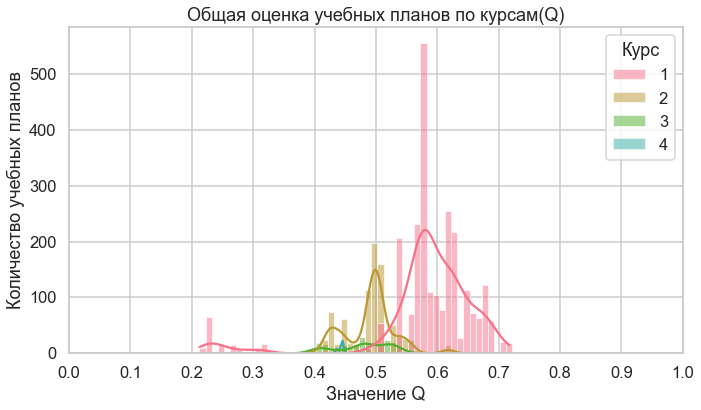

In [128]:
plt.figure(figsize=(11, 6))
plt.title(f"Общая оценка учебных планов по курсам(Q)")
plt.xticks(np.arange(0,1.1,0.1))
# plt.yticks(np.arange(0,122,2))
plt.xlim(0,1)
sns.histplot(data=tot_transit, x="Q", binwidth=0.01, hue="Курс", kde=True)
plt.xlabel("Значение Q")
plt.ylabel("Количество учебных планов")
plt.show()

In [129]:
transit_sum_r = transit.groupby(["УЧ_ГОД", "ОТКУДА_ОП"])["COUNT(ЧЛВК_ИД)"].sum().reset_index()
tot_transit_r = pd.merge(tot, transit_sum_r, left_on=["up_title", "up_id"], right_on=["ОТКУДА_ОП", "УЧ_ГОД"])
tot_transit_r = pd.merge(tot_transit_r, uniq_year[["up_title", "Учебный год", "Курс", "qualification"]], left_on=["up_title", "up_id"], right_on=["up_title", "Учебный год"])
tot_transit_r["Квалификация"] = tot_transit_r.qualification.apply(lambda x: "Магистратура" if x == "master" else "Бакалавриат")

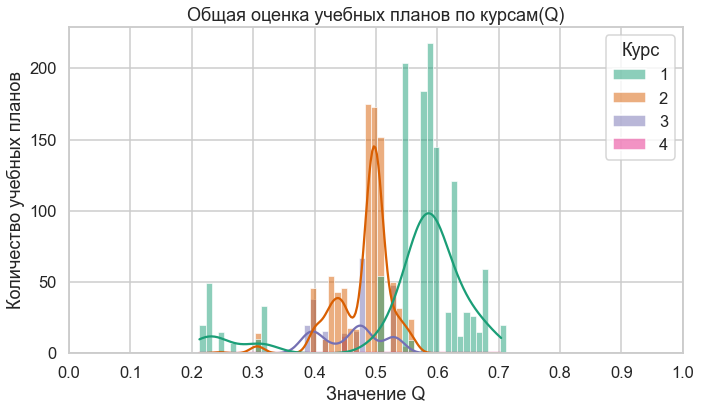

In [134]:
sns.set_palette("Set1")

plt.figure(figsize=(11, 6))
plt.title(f"Общая оценка учебных планов по курсам(Q)")
plt.xticks(np.arange(0,1.1,0.1))
# plt.yticks(np.arange(0,122,2))
plt.xlim(0,1)
sns.histplot(data=tot_transit_r, x="Q", binwidth=0.01, hue="Курс", kde=True, palette="Dark2")
plt.xlabel("Значение Q")
plt.ylabel("Количество учебных планов")
plt.show()

In [139]:
tot_transit_r.drop_duplicates(subset=["up_title", "up_id"])

up_id                                           up_title n_courses  \
0     2022/2023                            Беспроводные технологии        54   
54    2021/2022  Биотехнология продуктов функционального назнач...         2   
56    2020/2021                 Большие данные и машинное обучение        21   
77    2018/2019                      Вычислительные системы и сети         9   
86    2019/2020                      Вычислительные системы и сети        25   
...         ...                                                ...       ...   
2223  2019/2020              Цифровые технологии в приборостроении        17   
2240  2020/2021                  Цифровые технологии умного города        26   
2266  2018/2019                           Экологический инжиниринг        20   
2286  2020/2021                           Экологический инжиниринг        38   
2324  2022/2023    Энергоэффективность и возобновляемая энергетика        27   

     n_clusters  modularity  diversity  inside_distance Учебный год_x  \
0             3       0.500    0.48914         0.697045     2022/2023   
54            2       0.000    0.00000              NaN     2021/2022   
56            5       0.630    0.74508         0.674485     2020/2021   
77            3       0.320    0.65329         0.669300     2018/2019   
86            5       0.407    0.65258         0.419191     2019/2020   
...         ...         ...        ...              ...           ...   
2223          3       0.319    0.42689         0.604301     2019/2020   
2240          6       0.597    0.80790         0.798094     2020/2021   
2266          0       0.000    0.00000         0.000000     2018/2019   
2286          2       0.000    0.40189         0.298094     2020/2021   
2324          3       0.375    0.58215         0.294279     2022/2023   

                                                  embed  num_of_disciplines  \
0     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
54    [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.1428571428571...                   2   
56    [0.4666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, ...                  19   
77    [0.40384615384615385, 1.0, 0.0, 0.611111111111...                   9   
86    [2.0, 0.3, 0.0, 0.0, 1.0909090909090908, 0.0, ...                  25   
...                                                 ...                 ...   
2223  [1.6111111111111112, 0.0, 0.0, 0.125, 1.0, 0.0...                  17   
2240  [2.6333333333333333, 0.0, 0.0, 0.1637426900584...                  25   
2266  [0.5076923076923077, 2.0, 0.0, 0.0, 0.2, 0.2, ...                  20   
2286  [2.833333333333333, 0.0, 0.0, 2.0, 0.0, 2.0, 0...                  38   
2324  [1.0, 1.1666666666666667, 0.25, 1.434523809523...                  27   

      connectivity         Q     УЧ_ГОД  \
0         0.524767  0.506954  2022/2023   
54        0.490259  0.245130  2021/2022   
56        0.440219  0.592649  2020/2021   
77        0.464716  0.559003  2018/2019   
86        0.343497  0.498038  2019/2020   
...            ...       ...        ...   
2223      0.423782  0.425336  2019/2020   
2240      0.506684  0.657292  2020/2021   
2266      0.424794  0.212397  2018/2019   
2286      0.389558  0.395724  2020/2021   
2324      0.307890  0.445020  2022/2023   

                                              ОТКУДА_ОП  COUNT(ЧЛВК_ИД)  \
0                               Беспроводные технологии               8   
54    Биотехнология продуктов функционального назнач...               1   
56                   Большие данные и машинное обучение               1   
77                        Вычислительные системы и сети               1   
86                        Вычислительные системы и сети               8   
...                                                 ...             ...   
2223              Цифровые технологии в приборостроении               1   
2240                  Цифровые технологии умного города               1   
2266                           

In [138]:
tot_transit.drop_duplicates(subset=["up_title", "up_id"])

up_id                                           up_title n_courses  \
0     2022/2023                            Беспроводные технологии        54   
54    2020/2021                 Большие данные и машинное обучение        21   
75    2021/2022                 Большие данные и машинное обучение        15   
90    2021/2022                              Водородная энергетика        29   
119   2018/2019                      Вычислительные системы и сети         9   
...         ...                                                ...       ...   
3420  2020/2021             Экономика высокотехнологичной компании        18   
3438  2021/2022             Экономика высокотехнологичной компании         5   
3443  2022/2023                Экотехнологии и устойчивое развитие        23   
3466  2022/2023    Энергоэффективность и возобновляемая энергетика        27   
3493  2022/2023  Энергоэффективные инженерные системы и техноло...        62   

     n_clusters  modularity  diversity  inside_distance Учебный год_x  \
0             3       0.500    0.48914         0.697045     2022/2023   
54            5       0.630    0.74508         0.674485     2020/2021   
75            4       0.436    0.69063         0.721790     2021/2022   
90            7       0.691    0.78573         0.876915     2021/2022   
119           3       0.320    0.65329         0.669300     2018/2019   
...         ...         ...        ...              ...           ...   
3420          3       0.444    0.59889         0.461931     2020/2021   
3438          2       0.000    0.39430         0.456642     2021/2022   
3443          6       0.429    0.75461         0.658636     2022/2023   
3466          3       0.375    0.58215         0.294279     2022/2023   
3493          7       0.629    0.76472         0.638858     2022/2023   

                                                  embed  num_of_disciplines  \
0     [0.30000000000000004, 6.0, 0.5454545454545454,...                  51   
54    [0.4666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, ...                  19   
75    [1.5795454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, ...                  13   
90    [2.3, 0.25, 0.0, 0.05263157894736842, 0.0, 3.2...                  28   
119   [0.40384615384615385, 1.0, 0.0, 0.611111111111...                   9   
...                                                 ...                 ...   
3420  [1.4166666666666665, 0.0, 0.0, 1.0, 0.0, 0.0, ...                  18   
3438  [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 1.6666666666666...                   5   
3443  [0.2111111111111111, 1.1111111111111112, 0.0, ...                  22   
3466  [1.0, 1.1666666666666667, 0.25, 1.434523809523...                  27   
3493  [2.2376984126984127, 0.0, 0.3666666666666667, ...                  59   

      connectivity         Q     УЧ_ГОД  \
0         0.524767  0.506954  2022/2023   
54        0.440219  0.592649  2020/2021   
75        0.544770  0.617700  2021/2022   
90        0.416675  0.601202  2021/2022   
119       0.464716  0.559003  2018/2019   
...            ...       ...        ...   
3420      0.372424  0.485657  2020/2021   
3438      0.478443  0.436371  2021/2022   
3443      0.441414  0.598012  2022/2023   
3466      0.307890  0.445020  2022/2023   
3493      0.354376  0.559548  2022/2023   

                                                КУДА_ОП  COUNT(ЧЛВК_ИД)  \
0                               Беспроводные технологии               4   
54                   Большие данные и машинное обучение               4   
75                   Большие данные и машинное обучение               4   
90                                Водородная энергетика               1   
119                       Вычислительные системы и сети              23   
...                                                 ...             ...   
3420             Экономика высокотехнологичной компании               2   
3438             Экономика высокотехнологичной компании               2   
3443                Экотехнолог

In [140]:
dvizh = pd.merge(tot_transit, tot_transit_r[["up_title", "up_id", "COUNT(ЧЛВК_ИД)"]], left_on=["up_title", "up_id"], right_on=["up_title", "up_id"]).drop_duplicates(subset=["up_title", "up_id"])
dvizh


up_id                                           up_title n_courses  \
0      2022/2023                            Беспроводные технологии        54   
2916   2020/2021                 Большие данные и машинное обучение        21   
3357   2018/2019                      Вычислительные системы и сети         9   
3438   2019/2020                      Вычислительные системы и сети        25   
4063   2020/2021                      Вычислительные системы и сети        29   
4904   2021/2022               Инвестиции в технологическом секторе         2   
4908   2020/2021  Инновационная экономика и отраслевое регулиров...        29   
5749   2020/2021                  Инновационное предпринимательство        41   
7430   2021/2022                  Инновационное предпринимательство        17   
7719   2018/2019                     Интеллектуальная робототехника         5   
7744   2019/2020                     Интеллектуальная робототехника        18   
8068   2020/2021                     Интеллектуальная робототехника        16   
8324   2020/2021    Интеллектуальные технологии в телекоммуникациях        33   
9413   2018/2019                       Инфокоммуникационные системы         8   
9477   2019/2020                       Инфокоммуникационные системы        21   
9918   2020/2021                        Информационная безопасность        29   
10759  2021/2022                        Информационная безопасность        11   
10880  2020/2021           Квантовые коммуникации и фемтотехнологии        32   
11904  2018/2019               Квантовые технологии в коммуникациях         9   
11985  2020/2021               Квантовые технологии в коммуникациях        14   
12181  2022/2023  Компьютерные технологии: Программирование и ис...        12   
12325  2018/2019   Конструирование и технология электронных средств         7   
12374  2020/2021   Конструирование и технология электронных средств        16   
12630  2018/2019   Лазеры для информационно-коммуникационных систем         8   
12694  2019/2020          Молекулярное питание и пищевые технологии        22   
13178  2018/2019                    Нанофотоника и квантовая оптика        16   
13434  2020/2021  Низкотемпературная и глубокая обработка биолог...        20   
13834  2018/2019                   Прикладная и компьютерная оптика        16   
14090  2019/2020                   Прикладная и компьютерная оптика        44   
16026  2022/2023                 Прикладная оптика / Applied optics        33   
17115  2020/2021  Проектирование киберфизических систем защиты и...        21   
17556  2020/2021  Проектирование тепломассообменного оборудовани...        38   
19000  2020/2021                                    Световой дизайн        15   
19225  2022/2023                  Световой дизайн / Lighting design         6   
19261  2020/2021        Системы и технологии цифрового производства        56   
22397  2021/2022        Системы и технологии цифрового производства        38   
23841  2022/2023      Стратегии и технологии цифровой трансформации        92   
32305  2019/2020                                 Техническая физика        16   
32561  2020/2021                                 Техническая физика        24   
33137  2022/2023       Техническая физика / Physics and engineering        56   
36273  2021/2022                          Умный город и урбанистика       144   
57009  2022/2023                          Умный город и урбанистика        87   
64578  2018/2019                  Управление в технических системах         5   
64603  2019/2020                  Управление в технических системах        16   
64859  2019/2020                   Управление движением и навигация        17   
65148  2022/2023                   Физика радиочастотных технологий        19   
65509  2021/2022                 Цифровая трансформация организаций        10   
65609  2019/2020  Цифровой электропривод робототехнических компл...        17   
65898  2018/2019              Цифровые тех

In [142]:
dvizh["diff"] = dvizh["COUNT(ЧЛВК_ИД)_x"]/dvizh["COUNT(ЧЛВК_ИД)_y"]
dvizh["diff"].describe()

count    51.000000
mean      3.197829
std       4.090960
min       0.333333
25%       1.000000
50%       2.000000
75%       4.000000
max      23.000000
Name: diff, dtype: float64

In [144]:
(dvizh["diff"] < 1).sum()

10

In [156]:
dvizh.loc[dvizh["diff"]<1][["Q", "diversity", "connectivity"]].describe()

Q  diversity  connectivity
count  10.000000  10.000000     10.000000
mean    0.495290   0.454671      0.535909
std     0.149422   0.338316      0.185888
min     0.232013   0.000000      0.356261
25%     0.441030   0.106722      0.428309
50%     0.500228   0.546575      0.494397
75%     0.597248   0.717737      0.586168
max     0.703952   0.827120      1.000000

In [154]:
dvizh.loc[(dvizh["diff"]<1)&(dvizh["Курс"]=="1")][["Q", "diversity", "connectivity"]].describe()

Q  diversity  connectivity
count  6.000000   6.000000      6.000000
mean   0.506500   0.478527      0.534473
std    0.197582   0.390081      0.069215
min    0.232013   0.000000      0.441892
25%    0.354516   0.122285      0.479211
50%    0.567150   0.615620      0.552776
75%    0.655610   0.795125      0.586168
max    0.703952   0.827120      0.607406

In [157]:
dvizh.loc[dvizh["diff"]>=1][["Q", "diversity", "connectivity"]].describe()

Q  diversity  connectivity
count  41.000000  41.000000     41.000000
mean    0.475744   0.513720      0.437767
std     0.130260   0.295323      0.086435
min     0.224538   0.000000      0.307890
25%     0.418834   0.426890      0.376696
50%     0.494504   0.622290      0.427928
75%     0.577616   0.745080      0.471748
max     0.677868   0.879230      0.791511